# Multi-armed bandits

River has a `bandit` module. It contains several multi-armed bandit policies, bandit environments, and utilities to benchmark policies on bandit problems.

Bandit environments in River implement the [Gym](https://www.gymlibrary.dev/) interface. You can thus load them with `gym.make`. Note that Gym is intended for reinforcement learning algorithms, while bandit policies are the simplest form of reinforcement learing. Bandit policies learn by receiving a reward after each step, while reinforcement learning algorithms have to learn from feedback that may arrive at the end of a (long) sequence of steps.

In [1]:
import gymnasium as gym

for k in gym.envs.registry:
    if k.startswith('river_bandits'):
        print(k)


River's bandit module offers the `bandit.evaluate` function to benchmark several policies on a given environment. It takes as input a list of bandit policies, a bandit environment (the problem to solve), and a reward object.

In [2]:
import gymnasium as gym
from river import bandit
import pandas as pd
from tqdm import tqdm
from river import stats

policies=[
    bandit.EpsilonGreedy(epsilon=0.1),
    bandit.EpsilonGreedy(epsilon=0.01),
    bandit.EpsilonGreedy(epsilon=0),
]

env = gym.make(
    'river_bandits/KArmedTestbed-v0',
    max_episode_steps=1000
)

trace = bandit.evaluate(
    policies=policies,
    env=env,
    reward_stat=stats.Mean(),
    n_episodes=(n_episodes := 2000),
)


The `bandit.evaluate` function returns a generator containing the results at each step of the benchmark. This can be wrapped with a `pandas.DataFrame` to gather all the results.

In [3]:
trace_df = pd.DataFrame(tqdm(
    trace, position=0, total=(
        n_episodes *
        len(policies) *
        env._max_episode_steps
    )
))
trace_df.sample(5, random_state=42)


  0%|          | 0/6000000 [00:00<?, ?it/s]

  0%|          | 11793/6000000 [00:00<00:50, 117923.65it/s]

  0%|          | 23586/6000000 [00:00<00:50, 117522.99it/s]

  1%|          | 35418/6000000 [00:00<00:50, 117879.37it/s]

  1%|          | 47207/6000000 [00:00<00:51, 116690.12it/s]

  1%|          | 58878/6000000 [00:00<00:51, 115750.51it/s]

  1%|          | 70788/6000000 [00:00<00:50, 116876.97it/s]

  1%|▏         | 82804/6000000 [00:00<00:50, 117941.03it/s]

  2%|▏         | 94705/6000000 [00:00<00:49, 118277.36it/s]

  2%|▏         | 106818/6000000 [00:00<00:49, 119164.25it/s]

  2%|▏         | 118771/6000000 [00:01<00:49, 119274.75it/s]

  2%|▏         | 130849/6000000 [00:01<00:49, 119731.51it/s]

  2%|▏         | 142823/6000000 [00:01<00:49, 119455.80it/s]

  3%|▎         | 154797/6000000 [00:01<00:48, 119539.48it/s]

  3%|▎         | 166907/6000000 [00:01<00:48, 120007.92it/s]

  3%|▎         | 178909/6000000 [00:01<00:48, 118908.39it/s]

  3%|▎         | 190918/6000000 [00:01<00:48, 119260.31it/s]

  3%|▎         | 202911/6000000 [00:01<00:48, 119458.73it/s]

  4%|▎         | 214859/6000000 [00:01<00:48, 119178.01it/s]

  4%|▍         | 226778/6000000 [00:01<00:48, 119075.83it/s]

  4%|▍         | 238753/6000000 [00:02<00:48, 119275.94it/s]

  4%|▍         | 250758/6000000 [00:02<00:48, 119503.99it/s]

  4%|▍         | 262709/6000000 [00:02<00:48, 119149.32it/s]

  5%|▍         | 274772/6000000 [00:02<00:47, 119591.18it/s]

  5%|▍         | 286868/6000000 [00:02<00:47, 119997.98it/s]

  5%|▍         | 298869/6000000 [00:02<00:47, 119882.44it/s]

  5%|▌         | 311028/6000000 [00:02<00:47, 120390.74it/s]

  5%|▌         | 323068/6000000 [00:02<00:47, 120264.60it/s]

  6%|▌         | 335095/6000000 [00:02<00:47, 119970.69it/s]

  6%|▌         | 347464/6000000 [00:02<00:46, 121082.20it/s]

  6%|▌         | 359573/6000000 [00:03<00:46, 120939.54it/s]

  6%|▌         | 371747/6000000 [00:03<00:46, 121177.36it/s]

  6%|▋         | 383866/6000000 [00:03<00:46, 120877.41it/s]

  7%|▋         | 395955/6000000 [00:03<00:46, 120355.54it/s]

  7%|▋         | 407992/6000000 [00:03<00:46, 120061.10it/s]

  7%|▋         | 420001/6000000 [00:03<00:46, 119828.23it/s]

  7%|▋         | 432001/6000000 [00:03<00:46, 119761.92it/s]

  7%|▋         | 444001/6000000 [00:03<00:46, 119665.69it/s]

  8%|▊         | 456002/6000000 [00:03<00:46, 119761.78it/s]

  8%|▊         | 468001/6000000 [00:03<00:46, 119652.84it/s]

  8%|▊         | 480001/6000000 [00:04<00:46, 119392.57it/s]

  8%|▊         | 491941/6000000 [00:04<00:54, 100946.84it/s]

  8%|▊         | 503742/6000000 [00:04<00:52, 105469.72it/s]

  9%|▊         | 515896/6000000 [00:04<00:49, 109883.13it/s]

  9%|▉         | 527891/6000000 [00:04<00:48, 112717.55it/s]

  9%|▉         | 539408/6000000 [00:04<00:48, 113419.46it/s]

  9%|▉         | 551237/6000000 [00:04<00:47, 114834.23it/s]

  9%|▉         | 563242/6000000 [00:04<00:46, 116363.41it/s]

 10%|▉         | 575073/6000000 [00:04<00:46, 116935.13it/s]

 10%|▉         | 587252/6000000 [00:04<00:45, 118374.20it/s]

 10%|▉         | 599184/6000000 [00:05<00:45, 118655.16it/s]

 10%|█         | 611203/6000000 [00:05<00:45, 119112.44it/s]

 10%|█         | 623138/6000000 [00:05<00:45, 118944.29it/s]

 11%|█         | 635049/6000000 [00:05<00:45, 118818.96it/s]

 11%|█         | 646943/6000000 [00:05<00:45, 118754.81it/s]

 11%|█         | 658958/6000000 [00:05<00:44, 119169.91it/s]

 11%|█         | 670881/6000000 [00:05<00:44, 119105.23it/s]

 11%|█▏        | 682888/6000000 [00:05<00:44, 119391.19it/s]

 12%|█▏        | 694831/6000000 [00:05<00:44, 119401.99it/s]

 12%|█▏        | 706811/6000000 [00:05<00:44, 119520.37it/s]

 12%|█▏        | 718765/6000000 [00:06<00:44, 119457.21it/s]

 12%|█▏        | 730874/6000000 [00:06<00:43, 119945.78it/s]

 12%|█▏        | 742870/6000000 [00:06<00:43, 119539.76it/s]

 13%|█▎        | 755053/6000000 [00:06<00:43, 120221.99it/s]

 13%|█▎        | 767108/6000000 [00:06<00:43, 120319.12it/s]

 13%|█▎        | 779141/6000000 [00:06<00:43, 119508.61it/s]

 13%|█▎        | 791094/6000000 [00:06<00:43, 119322.99it/s]

 13%|█▎        | 803028/6000000 [00:06<00:43, 119115.78it/s]

 14%|█▎        | 815159/6000000 [00:06<00:43, 119769.10it/s]

 14%|█▍        | 827137/6000000 [00:06<00:43, 119121.29it/s]

 14%|█▍        | 839051/6000000 [00:07<00:43, 119004.41it/s]

 14%|█▍        | 850953/6000000 [00:07<00:43, 118798.00it/s]

 14%|█▍        | 862834/6000000 [00:07<00:43, 118727.84it/s]

 15%|█▍        | 874813/6000000 [00:07<00:43, 119044.46it/s]

 15%|█▍        | 886718/6000000 [00:07<00:43, 118772.40it/s]

 15%|█▍        | 898596/6000000 [00:07<00:43, 118521.36it/s]

 15%|█▌        | 910636/6000000 [00:07<00:42, 119081.92it/s]

 15%|█▌        | 922569/6000000 [00:07<00:42, 119154.05it/s]

 16%|█▌        | 934485/6000000 [00:07<00:42, 118855.08it/s]

 16%|█▌        | 946371/6000000 [00:07<00:42, 118398.78it/s]

 16%|█▌        | 958212/6000000 [00:08<00:42, 118314.16it/s]

 16%|█▌        | 970044/6000000 [00:08<00:42, 118248.54it/s]

 16%|█▋        | 981951/6000000 [00:08<00:42, 118492.97it/s]

 17%|█▋        | 993801/6000000 [00:08<00:42, 118241.02it/s]

 17%|█▋        | 1005626/6000000 [00:08<00:42, 118160.67it/s]

 17%|█▋        | 1017443/6000000 [00:08<00:42, 117702.10it/s]

 17%|█▋        | 1029372/6000000 [00:08<00:42, 118173.21it/s]

 17%|█▋        | 1041260/6000000 [00:08<00:41, 118382.66it/s]

 18%|█▊        | 1053099/6000000 [00:08<00:41, 118086.99it/s]

 18%|█▊        | 1065002/6000000 [00:08<00:41, 118333.47it/s]

 18%|█▊        | 1077001/6000000 [00:09<00:41, 118543.08it/s]

 18%|█▊        | 1089070/6000000 [00:09<00:41, 119182.66it/s]

 18%|█▊        | 1101001/6000000 [00:09<00:41, 119068.98it/s]

 19%|█▊        | 1113002/6000000 [00:09<00:40, 119329.90it/s]

 19%|█▉        | 1125003/6000000 [00:09<00:40, 119492.28it/s]

 19%|█▉        | 1136953/6000000 [00:09<00:40, 119214.46it/s]

 19%|█▉        | 1148954/6000000 [00:09<00:40, 119450.11it/s]

 19%|█▉        | 1161001/6000000 [00:09<00:40, 119198.08it/s]

 20%|█▉        | 1173001/6000000 [00:09<00:40, 118848.84it/s]

 20%|█▉        | 1185001/6000000 [00:10<00:40, 118936.63it/s]

 20%|█▉        | 1197001/6000000 [00:10<00:40, 118847.60it/s]

 20%|██        | 1209001/6000000 [00:10<00:40, 118971.10it/s]

 20%|██        | 1221001/6000000 [00:10<00:40, 118994.29it/s]

 21%|██        | 1233001/6000000 [00:10<00:39, 119260.77it/s]

 21%|██        | 1245024/6000000 [00:10<00:39, 119547.51it/s]

 21%|██        | 1257002/6000000 [00:10<00:39, 119569.42it/s]

 21%|██        | 1269015/6000000 [00:10<00:39, 119736.11it/s]

 21%|██▏       | 1281064/6000000 [00:10<00:39, 119960.13it/s]

 22%|██▏       | 1293061/6000000 [00:10<00:39, 119555.29it/s]

 22%|██▏       | 1305052/6000000 [00:11<00:39, 119659.60it/s]

 22%|██▏       | 1317059/6000000 [00:11<00:39, 119781.45it/s]

 22%|██▏       | 1329196/6000000 [00:11<00:38, 120256.52it/s]

 22%|██▏       | 1341222/6000000 [00:11<00:38, 119949.25it/s]

 23%|██▎       | 1353218/6000000 [00:11<00:38, 119616.96it/s]

 23%|██▎       | 1365495/6000000 [00:11<00:38, 120557.37it/s]

 23%|██▎       | 1377552/6000000 [00:11<00:39, 118437.48it/s]

 23%|██▎       | 1389487/6000000 [00:11<00:38, 118704.86it/s]

 23%|██▎       | 1401567/6000000 [00:11<00:38, 119326.04it/s]

 24%|██▎       | 1413686/6000000 [00:11<00:38, 119879.19it/s]

 24%|██▍       | 1425678/6000000 [00:12<00:38, 119582.97it/s]

 24%|██▍       | 1437640/6000000 [00:12<00:38, 119229.29it/s]

 24%|██▍       | 1449638/6000000 [00:12<00:38, 119451.35it/s]

 24%|██▍       | 1461585/6000000 [00:12<00:38, 118547.41it/s]

 25%|██▍       | 1473444/6000000 [00:12<00:38, 118557.68it/s]

 25%|██▍       | 1485309/6000000 [00:12<00:38, 118583.90it/s]

 25%|██▍       | 1497169/6000000 [00:12<00:38, 117066.32it/s]

 25%|██▌       | 1509200/6000000 [00:12<00:38, 118026.76it/s]

 25%|██▌       | 1521155/6000000 [00:12<00:37, 118477.10it/s]

 26%|██▌       | 1533095/6000000 [00:12<00:37, 118751.54it/s]

 26%|██▌       | 1545001/6000000 [00:13<00:37, 118511.88it/s]

 26%|██▌       | 1557001/6000000 [00:13<00:37, 118584.46it/s]

 26%|██▌       | 1569001/6000000 [00:13<00:37, 118765.95it/s]

 26%|██▋       | 1581001/6000000 [00:13<00:37, 118527.75it/s]

 27%|██▋       | 1593001/6000000 [00:13<00:37, 118883.60it/s]

 27%|██▋       | 1605003/6000000 [00:13<00:36, 119199.42it/s]

 27%|██▋       | 1616984/6000000 [00:13<00:36, 119379.41it/s]

 27%|██▋       | 1628923/6000000 [00:13<00:37, 118061.48it/s]

 27%|██▋       | 1640733/6000000 [00:13<00:36, 117908.52it/s]

 28%|██▊       | 1652527/6000000 [00:13<00:36, 117894.16it/s]

 28%|██▊       | 1664330/6000000 [00:14<00:36, 117932.71it/s]

 28%|██▊       | 1676424/6000000 [00:14<00:36, 118830.25it/s]

 28%|██▊       | 1688309/6000000 [00:14<00:36, 118797.05it/s]

 28%|██▊       | 1700303/6000000 [00:14<00:36, 119137.09it/s]

 29%|██▊       | 1712218/6000000 [00:14<00:36, 118628.27it/s]

 29%|██▊       | 1724146/6000000 [00:14<00:35, 118820.57it/s]

 29%|██▉       | 1736029/6000000 [00:14<00:35, 118813.00it/s]

 29%|██▉       | 1747911/6000000 [00:14<00:35, 118645.42it/s]

 29%|██▉       | 1759781/6000000 [00:14<00:35, 118659.50it/s]

 30%|██▉       | 1771648/6000000 [00:14<00:35, 118485.19it/s]

 30%|██▉       | 1783497/6000000 [00:15<00:35, 118222.51it/s]

 30%|██▉       | 1795320/6000000 [00:15<00:35, 118141.39it/s]

 30%|███       | 1807214/6000000 [00:15<00:35, 118378.08it/s]

 30%|███       | 1819052/6000000 [00:15<00:35, 118034.80it/s]

 31%|███       | 1830856/6000000 [00:15<00:35, 117836.39it/s]

 31%|███       | 1842640/6000000 [00:15<00:35, 117682.42it/s]

 31%|███       | 1854478/6000000 [00:15<00:35, 117889.50it/s]

 31%|███       | 1866268/6000000 [00:15<00:35, 116847.39it/s]

 31%|███▏      | 1878089/6000000 [00:15<00:35, 117252.07it/s]

 32%|███▏      | 1890115/6000000 [00:15<00:34, 118147.80it/s]

 32%|███▏      | 1902002/6000000 [00:16<00:34, 118322.17it/s]

 32%|███▏      | 1914001/6000000 [00:16<00:34, 118206.46it/s]

 32%|███▏      | 1926001/6000000 [00:16<00:34, 118205.74it/s]

 32%|███▏      | 1938001/6000000 [00:16<00:34, 118120.90it/s]

 33%|███▎      | 1950001/6000000 [00:16<00:34, 118515.66it/s]

 33%|███▎      | 1962001/6000000 [00:16<00:34, 118225.26it/s]

 33%|███▎      | 1974001/6000000 [00:16<00:33, 118425.41it/s]

 33%|███▎      | 1985845/6000000 [00:16<00:34, 117325.82it/s]

 33%|███▎      | 1997681/6000000 [00:16<00:34, 117629.67it/s]

 33%|███▎      | 2009534/6000000 [00:16<00:33, 117895.52it/s]

 34%|███▎      | 2021325/6000000 [00:17<00:33, 117418.43it/s]

 34%|███▍      | 2033134/6000000 [00:17<00:33, 117617.49it/s]

 34%|███▍      | 2044897/6000000 [00:17<00:33, 117604.27it/s]

 34%|███▍      | 2056659/6000000 [00:17<00:33, 117534.20it/s]

 34%|███▍      | 2068413/6000000 [00:17<00:33, 117520.97it/s]

 35%|███▍      | 2080260/6000000 [00:17<00:33, 117802.57it/s]

 35%|███▍      | 2092259/6000000 [00:17<00:32, 118455.37it/s]

 35%|███▌      | 2104105/6000000 [00:17<00:32, 118219.61it/s]

 35%|███▌      | 2115940/6000000 [00:17<00:32, 118255.47it/s]

 35%|███▌      | 2127803/6000000 [00:17<00:32, 118364.82it/s]

 36%|███▌      | 2139856/6000000 [00:18<00:32, 119012.50it/s]

 36%|███▌      | 2151758/6000000 [00:18<00:32, 118704.95it/s]

 36%|███▌      | 2163629/6000000 [00:18<00:32, 118325.62it/s]

 36%|███▋      | 2175462/6000000 [00:18<00:32, 118187.35it/s]

 36%|███▋      | 2187313/6000000 [00:18<00:32, 118282.57it/s]

 37%|███▋      | 2199142/6000000 [00:18<00:32, 118076.07it/s]

 37%|███▋      | 2211001/6000000 [00:18<00:32, 118106.86it/s]

 37%|███▋      | 2223001/6000000 [00:18<00:31, 118049.58it/s]

 37%|███▋      | 2235001/6000000 [00:18<00:31, 118410.62it/s]

 37%|███▋      | 2246956/6000000 [00:18<00:31, 118747.12it/s]

 38%|███▊      | 2258831/6000000 [00:19<00:31, 118307.85it/s]

 38%|███▊      | 2270787/6000000 [00:19<00:31, 118679.13it/s]

 38%|███▊      | 2282656/6000000 [00:19<00:31, 118199.67it/s]

 38%|███▊      | 2294720/6000000 [00:19<00:31, 118925.22it/s]

 38%|███▊      | 2306650/6000000 [00:19<00:31, 119035.22it/s]

 39%|███▊      | 2318555/6000000 [00:19<00:31, 118362.45it/s]

 39%|███▉      | 2330487/6000000 [00:19<00:30, 118646.63it/s]

 39%|███▉      | 2342353/6000000 [00:19<00:30, 118361.73it/s]

 39%|███▉      | 2354213/6000000 [00:19<00:30, 118431.31it/s]

 39%|███▉      | 2366057/6000000 [00:19<00:30, 118375.79it/s]

 40%|███▉      | 2377895/6000000 [00:20<00:30, 118299.87it/s]

 40%|███▉      | 2389834/6000000 [00:20<00:30, 118624.67it/s]

 40%|████      | 2401849/6000000 [00:20<00:30, 119079.44it/s]

 40%|████      | 2413758/6000000 [00:20<00:30, 118289.92it/s]

 40%|████      | 2425589/6000000 [00:20<00:30, 118081.42it/s]

 41%|████      | 2437462/6000000 [00:20<00:30, 118272.51it/s]

 41%|████      | 2449299/6000000 [00:20<00:30, 118300.17it/s]

 41%|████      | 2461130/6000000 [00:20<00:29, 118241.48it/s]

 41%|████      | 2472995/6000000 [00:20<00:29, 118361.61it/s]

 41%|████▏     | 2484832/6000000 [00:20<00:29, 118128.19it/s]

 42%|████▏     | 2496646/6000000 [00:21<00:31, 111509.84it/s]

 42%|████▏     | 2507873/6000000 [00:21<00:32, 108393.19it/s]

 42%|████▏     | 2519651/6000000 [00:21<00:31, 111065.35it/s]

 42%|████▏     | 2531516/6000000 [00:21<00:30, 113257.30it/s]

 42%|████▏     | 2543317/6000000 [00:21<00:30, 114646.16it/s]

 43%|████▎     | 2555095/6000000 [00:21<00:29, 115567.23it/s]

 43%|████▎     | 2566999/6000000 [00:21<00:29, 116594.20it/s]

 43%|████▎     | 2578680/6000000 [00:21<00:30, 113681.54it/s]

 43%|████▎     | 2590582/6000000 [00:21<00:29, 115243.09it/s]

 43%|████▎     | 2602514/6000000 [00:22<00:29, 116444.55it/s]

 44%|████▎     | 2614200/6000000 [00:22<00:29, 116565.66it/s]

 44%|████▍     | 2625978/6000000 [00:22<00:28, 116924.94it/s]

 44%|████▍     | 2637735/6000000 [00:22<00:28, 117116.51it/s]

 44%|████▍     | 2649591/6000000 [00:22<00:28, 117544.77it/s]

 44%|████▍     | 2661469/6000000 [00:22<00:28, 117912.52it/s]

 45%|████▍     | 2673327/6000000 [00:22<00:28, 118109.86it/s]

 45%|████▍     | 2685489/6000000 [00:22<00:27, 119158.33it/s]

 45%|████▍     | 2697407/6000000 [00:22<00:27, 119085.56it/s]

 45%|████▌     | 2709373/6000000 [00:22<00:27, 119254.48it/s]

 45%|████▌     | 2721302/6000000 [00:23<00:27, 119262.35it/s]

 46%|████▌     | 2733229/6000000 [00:23<00:35, 92462.05it/s] 

 46%|████▌     | 2745019/6000000 [00:23<00:32, 98801.52it/s]

 46%|████▌     | 2757001/6000000 [00:23<00:31, 104128.19it/s]

 46%|████▌     | 2769001/6000000 [00:23<00:29, 107833.05it/s]

 46%|████▋     | 2780941/6000000 [00:23<00:28, 111057.56it/s]

 47%|████▋     | 2792700/6000000 [00:23<00:28, 112916.91it/s]

 47%|████▋     | 2804306/6000000 [00:23<00:28, 113825.68it/s]

 47%|████▋     | 2816151/6000000 [00:23<00:27, 115176.54it/s]

 47%|████▋     | 2827953/6000000 [00:24<00:27, 116011.84it/s]

 47%|████▋     | 2839647/6000000 [00:24<00:27, 116205.91it/s]

 48%|████▊     | 2851372/6000000 [00:24<00:27, 116515.11it/s]

 48%|████▊     | 2863070/6000000 [00:24<00:26, 116285.33it/s]

 48%|████▊     | 2875011/6000000 [00:24<00:26, 117214.32it/s]

 48%|████▊     | 2886916/6000000 [00:24<00:26, 117759.25it/s]

 48%|████▊     | 2898709/6000000 [00:24<00:26, 117775.16it/s]

 49%|████▊     | 2910541/6000000 [00:24<00:26, 117935.70it/s]

 49%|████▊     | 2922343/6000000 [00:24<00:26, 115882.58it/s]

 49%|████▉     | 2934043/6000000 [00:24<00:26, 116210.72it/s]

 49%|████▉     | 2946001/6000000 [00:25<00:26, 117133.16it/s]

 49%|████▉     | 2958001/6000000 [00:25<00:25, 117589.99it/s]

 50%|████▉     | 2970083/6000000 [00:25<00:25, 118550.50it/s]

 50%|████▉     | 2982001/6000000 [00:25<00:25, 118714.66it/s]

 50%|████▉     | 2994001/6000000 [00:25<00:25, 118505.89it/s]

 50%|█████     | 3005945/6000000 [00:25<00:25, 118782.83it/s]

 50%|█████     | 3017919/6000000 [00:25<00:25, 119065.39it/s]

 50%|█████     | 3029827/6000000 [00:25<00:25, 118702.60it/s]

 51%|█████     | 3041699/6000000 [00:25<00:25, 118232.00it/s]

 51%|█████     | 3053524/6000000 [00:25<00:24, 118117.13it/s]

 51%|█████     | 3065437/6000000 [00:26<00:24, 118418.72it/s]

 51%|█████▏    | 3077291/6000000 [00:26<00:24, 118454.17it/s]

 51%|█████▏    | 3089137/6000000 [00:26<00:24, 118187.26it/s]

 52%|█████▏    | 3100957/6000000 [00:26<00:24, 117839.09it/s]

 52%|█████▏    | 3112742/6000000 [00:26<00:24, 117828.88it/s]

 52%|█████▏    | 3124526/6000000 [00:26<00:24, 117636.80it/s]

 52%|█████▏    | 3136341/6000000 [00:26<00:24, 117788.35it/s]

 52%|█████▏    | 3148121/6000000 [00:26<00:24, 117694.87it/s]

 53%|█████▎    | 3159891/6000000 [00:26<00:24, 117648.92it/s]

 53%|█████▎    | 3171656/6000000 [00:26<00:24, 114627.45it/s]

 53%|█████▎    | 3183332/6000000 [00:27<00:24, 115252.98it/s]

 53%|█████▎    | 3195250/6000000 [00:27<00:24, 116413.46it/s]

 53%|█████▎    | 3207177/6000000 [00:27<00:23, 117260.13it/s]

 54%|█████▎    | 3219002/6000000 [00:27<00:23, 117513.54it/s]

 54%|█████▍    | 3231001/6000000 [00:27<00:23, 118052.51it/s]

 54%|█████▍    | 3242891/6000000 [00:27<00:23, 118302.65it/s]

 54%|█████▍    | 3254729/6000000 [00:27<00:23, 118324.13it/s]

 54%|█████▍    | 3266564/6000000 [00:27<00:23, 118139.61it/s]

 55%|█████▍    | 3278380/6000000 [00:27<00:23, 118098.40it/s]

 55%|█████▍    | 3290191/6000000 [00:27<00:23, 114303.05it/s]

 55%|█████▌    | 3302000/6000000 [00:28<00:23, 115409.42it/s]

 55%|█████▌    | 3313896/6000000 [00:28<00:23, 116455.00it/s]

 55%|█████▌    | 3325614/6000000 [00:28<00:22, 116669.00it/s]

 56%|█████▌    | 3337376/6000000 [00:28<00:22, 116950.01it/s]

 56%|█████▌    | 3349215/6000000 [00:28<00:22, 117377.63it/s]

 56%|█████▌    | 3361082/6000000 [00:28<00:22, 117762.07it/s]

 56%|█████▌    | 3372897/6000000 [00:28<00:22, 117875.03it/s]

 56%|█████▋    | 3384688/6000000 [00:28<00:22, 117617.98it/s]

 57%|█████▋    | 3396453/6000000 [00:28<00:22, 117487.93it/s]

 57%|█████▋    | 3408204/6000000 [00:28<00:22, 113184.58it/s]

 57%|█████▋    | 3420372/6000000 [00:29<00:22, 115660.41it/s]

 57%|█████▋    | 3432081/6000000 [00:29<00:22, 116078.96it/s]

 57%|█████▋    | 3444039/6000000 [00:29<00:21, 117113.51it/s]

 58%|█████▊    | 3456052/6000000 [00:29<00:21, 118006.19it/s]

 58%|█████▊    | 3468001/6000000 [00:29<00:21, 118437.10it/s]

 58%|█████▊    | 3480001/6000000 [00:29<00:21, 118223.89it/s]

 58%|█████▊    | 3492001/6000000 [00:29<00:21, 118244.50it/s]

 58%|█████▊    | 3504001/6000000 [00:29<00:21, 118226.50it/s]

 59%|█████▊    | 3516001/6000000 [00:29<00:21, 118189.99it/s]

 59%|█████▉    | 3527958/6000000 [00:29<00:20, 118598.46it/s]

 59%|█████▉    | 3539864/6000000 [00:30<00:20, 118732.98it/s]

 59%|█████▉    | 3551910/6000000 [00:30<00:20, 119246.12it/s]

 59%|█████▉    | 3563836/6000000 [00:30<00:20, 118445.54it/s]

 60%|█████▉    | 3575683/6000000 [00:30<00:20, 118032.31it/s]

 60%|█████▉    | 3587488/6000000 [00:30<00:20, 117651.64it/s]

 60%|█████▉    | 3599255/6000000 [00:30<00:20, 117516.07it/s]

 60%|██████    | 3611070/6000000 [00:30<00:20, 117704.03it/s]

 60%|██████    | 3622841/6000000 [00:30<00:20, 117505.84it/s]

 61%|██████    | 3634612/6000000 [00:30<00:20, 117563.43it/s]

 61%|██████    | 3646456/6000000 [00:30<00:19, 117823.72it/s]

 61%|██████    | 3658239/6000000 [00:31<00:19, 117645.85it/s]

 61%|██████    | 3670004/6000000 [00:31<00:19, 117498.33it/s]

 61%|██████▏   | 3681862/6000000 [00:31<00:19, 117819.82it/s]

 62%|██████▏   | 3693711/6000000 [00:31<00:19, 118019.44it/s]

 62%|██████▏   | 3705514/6000000 [00:31<00:19, 115394.26it/s]

 62%|██████▏   | 3717129/6000000 [00:31<00:19, 115614.24it/s]

 62%|██████▏   | 3729002/6000000 [00:31<00:19, 116514.84it/s]

 62%|██████▏   | 3741001/6000000 [00:31<00:19, 117473.13it/s]

 63%|██████▎   | 3752987/6000000 [00:31<00:19, 118183.87it/s]

 63%|██████▎   | 3764810/6000000 [00:31<00:19, 117380.88it/s]

 63%|██████▎   | 3776574/6000000 [00:32<00:18, 117456.20it/s]

 63%|██████▎   | 3788539/6000000 [00:32<00:18, 118109.44it/s]

 63%|██████▎   | 3800353/6000000 [00:32<00:18, 118039.47it/s]

 64%|██████▎   | 3812312/6000000 [00:32<00:18, 118501.14it/s]

 64%|██████▎   | 3824437/6000000 [00:32<00:18, 119323.19it/s]

 64%|██████▍   | 3836371/6000000 [00:32<00:18, 118954.24it/s]

 64%|██████▍   | 3848268/6000000 [00:32<00:18, 118621.49it/s]

 64%|██████▍   | 3860131/6000000 [00:32<00:18, 118390.93it/s]

 65%|██████▍   | 3871971/6000000 [00:32<00:18, 118100.92it/s]

 65%|██████▍   | 3883782/6000000 [00:32<00:18, 117463.11it/s]

 65%|██████▍   | 3895592/6000000 [00:33<00:17, 117651.84it/s]

 65%|██████▌   | 3907449/6000000 [00:33<00:17, 117925.10it/s]

 65%|██████▌   | 3919244/6000000 [00:33<00:17, 117929.38it/s]

 66%|██████▌   | 3931038/6000000 [00:33<00:17, 117908.70it/s]

 66%|██████▌   | 3942830/6000000 [00:33<00:17, 117736.95it/s]

 66%|██████▌   | 3954604/6000000 [00:33<00:17, 117663.42it/s]

 66%|██████▌   | 3966371/6000000 [00:33<00:17, 117634.53it/s]

 66%|██████▋   | 3978155/6000000 [00:33<00:17, 117694.59it/s]

 67%|██████▋   | 3990162/6000000 [00:33<00:16, 118404.38it/s]

 67%|██████▋   | 4002169/6000000 [00:33<00:16, 118901.91it/s]

 67%|██████▋   | 4014060/6000000 [00:34<00:16, 117283.27it/s]

 67%|██████▋   | 4026001/6000000 [00:34<00:16, 117391.26it/s]

 67%|██████▋   | 4038001/6000000 [00:34<00:16, 117547.79it/s]

 68%|██████▊   | 4050001/6000000 [00:34<00:16, 117705.66it/s]

 68%|██████▊   | 4061997/6000000 [00:34<00:16, 118373.44it/s]

 68%|██████▊   | 4073837/6000000 [00:34<00:16, 118315.71it/s]

 68%|██████▊   | 4085670/6000000 [00:34<00:16, 118126.30it/s]

 68%|██████▊   | 4097707/6000000 [00:34<00:16, 118793.41it/s]

 68%|██████▊   | 4109616/6000000 [00:34<00:15, 118878.45it/s]

 69%|██████▊   | 4121519/6000000 [00:35<00:15, 118921.88it/s]

 69%|██████▉   | 4133415/6000000 [00:35<00:15, 118932.48it/s]

 69%|██████▉   | 4145309/6000000 [00:35<00:15, 118676.37it/s]

 69%|██████▉   | 4157177/6000000 [00:35<00:15, 118580.78it/s]

 69%|██████▉   | 4169036/6000000 [00:35<00:15, 118444.61it/s]

 70%|██████▉   | 4180881/6000000 [00:35<00:15, 118440.85it/s]

 70%|██████▉   | 4192740/6000000 [00:35<00:15, 118484.79it/s]

 70%|███████   | 4204589/6000000 [00:35<00:15, 118418.62it/s]

 70%|███████   | 4216431/6000000 [00:35<00:15, 118313.00it/s]

 70%|███████   | 4228363/6000000 [00:35<00:14, 118613.49it/s]

 71%|███████   | 4240225/6000000 [00:36<00:14, 118334.77it/s]

 71%|███████   | 4252059/6000000 [00:36<00:14, 116940.06it/s]

 71%|███████   | 4263845/6000000 [00:36<00:14, 117211.17it/s]

 71%|███████▏  | 4275693/6000000 [00:36<00:14, 117586.68it/s]

 71%|███████▏  | 4287514/6000000 [00:36<00:14, 117770.44it/s]

 72%|███████▏  | 4299293/6000000 [00:36<00:14, 117602.13it/s]

 72%|███████▏  | 4311055/6000000 [00:36<00:14, 117482.82it/s]

 72%|███████▏  | 4323001/6000000 [00:36<00:14, 117419.12it/s]

 72%|███████▏  | 4335001/6000000 [00:36<00:14, 117630.34it/s]

 72%|███████▏  | 4347001/6000000 [00:36<00:13, 118301.20it/s]

 73%|███████▎  | 4359001/6000000 [00:37<00:13, 118343.65it/s]

 73%|███████▎  | 4370836/6000000 [00:37<00:14, 115515.47it/s]

 73%|███████▎  | 4382657/6000000 [00:37<00:13, 116304.65it/s]

 73%|███████▎  | 4394374/6000000 [00:37<00:13, 116559.29it/s]

 73%|███████▎  | 4406312/6000000 [00:37<00:13, 117395.12it/s]

 74%|███████▎  | 4418059/6000000 [00:37<00:13, 117302.78it/s]

 74%|███████▍  | 4429796/6000000 [00:37<00:13, 117320.44it/s]

 74%|███████▍  | 4441630/6000000 [00:37<00:13, 117622.72it/s]

 74%|███████▍  | 4453395/6000000 [00:37<00:13, 117583.03it/s]

 74%|███████▍  | 4465283/6000000 [00:37<00:13, 117968.55it/s]

 75%|███████▍  | 4477082/6000000 [00:38<00:12, 117887.38it/s]

 75%|███████▍  | 4488872/6000000 [00:38<00:12, 117704.44it/s]

 75%|███████▌  | 4500734/6000000 [00:38<00:12, 117977.92it/s]

 75%|███████▌  | 4512605/6000000 [00:38<00:12, 118196.05it/s]

 75%|███████▌  | 4524426/6000000 [00:38<00:12, 117835.73it/s]

 76%|███████▌  | 4536211/6000000 [00:38<00:12, 117791.48it/s]

 76%|███████▌  | 4548024/6000000 [00:38<00:12, 117889.38it/s]

 76%|███████▌  | 4560002/6000000 [00:38<00:12, 118446.77it/s]

 76%|███████▌  | 4572001/6000000 [00:38<00:12, 118397.16it/s]

 76%|███████▋  | 4584001/6000000 [00:38<00:11, 118165.19it/s]

 77%|███████▋  | 4596001/6000000 [00:39<00:11, 118066.19it/s]

 77%|███████▋  | 4607808/6000000 [00:39<00:11, 116902.55it/s]

 77%|███████▋  | 4619601/6000000 [00:39<00:11, 117204.42it/s]

 77%|███████▋  | 4631349/6000000 [00:39<00:11, 117283.22it/s]

 77%|███████▋  | 4643247/6000000 [00:39<00:11, 117786.00it/s]

 78%|███████▊  | 4655116/6000000 [00:39<00:11, 118054.58it/s]

 78%|███████▊  | 4666937/6000000 [00:39<00:11, 118098.40it/s]

 78%|███████▊  | 4678773/6000000 [00:39<00:11, 118174.04it/s]

 78%|███████▊  | 4690591/6000000 [00:39<00:11, 117821.72it/s]

 78%|███████▊  | 4702374/6000000 [00:39<00:11, 117620.37it/s]

 79%|███████▊  | 4714230/6000000 [00:40<00:10, 117899.89it/s]

 79%|███████▉  | 4726021/6000000 [00:40<00:11, 112810.14it/s]

 79%|███████▉  | 4737742/6000000 [00:40<00:11, 114085.91it/s]

 79%|███████▉  | 4749396/6000000 [00:40<00:10, 114804.71it/s]

 79%|███████▉  | 4761195/6000000 [00:40<00:10, 115742.17it/s]

 80%|███████▉  | 4773203/6000000 [00:40<00:10, 117027.38it/s]

 80%|███████▉  | 4785001/6000000 [00:40<00:10, 117122.02it/s]

 80%|███████▉  | 4797003/6000000 [00:40<00:10, 117958.37it/s]

 80%|████████  | 4809001/6000000 [00:40<00:10, 118231.89it/s]

 80%|████████  | 4821001/6000000 [00:40<00:09, 118365.25it/s]

 81%|████████  | 4833001/6000000 [00:41<00:09, 118160.14it/s]

 81%|████████  | 4844820/6000000 [00:41<00:10, 114133.75it/s]

 81%|████████  | 4856480/6000000 [00:41<00:09, 114848.57it/s]

 81%|████████  | 4868134/6000000 [00:41<00:09, 115342.31it/s]

 81%|████████▏ | 4879875/6000000 [00:41<00:09, 115952.09it/s]

 82%|████████▏ | 4891796/6000000 [00:41<00:09, 116917.74it/s]

 82%|████████▏ | 4903548/6000000 [00:41<00:09, 117096.12it/s]

 82%|████████▏ | 4915318/6000000 [00:41<00:09, 117274.71it/s]

 82%|████████▏ | 4927142/6000000 [00:41<00:09, 117562.27it/s]

 82%|████████▏ | 4938902/6000000 [00:41<00:09, 117277.41it/s]

 83%|████████▎ | 4950633/6000000 [00:42<00:08, 117255.93it/s]

 83%|████████▎ | 4962361/6000000 [00:42<00:09, 113499.09it/s]

 83%|████████▎ | 4974021/6000000 [00:42<00:08, 114405.29it/s]

 83%|████████▎ | 4985483/6000000 [00:42<00:11, 85394.99it/s] 

 83%|████████▎ | 4997190/6000000 [00:42<00:10, 92966.34it/s]

 83%|████████▎ | 5008972/6000000 [00:42<00:09, 99291.88it/s]

 84%|████████▎ | 5020730/6000000 [00:42<00:09, 104168.31it/s]

 84%|████████▍ | 5032583/6000000 [00:42<00:08, 108129.77it/s]

 84%|████████▍ | 5044427/6000000 [00:42<00:08, 111041.70it/s]

 84%|████████▍ | 5056230/6000000 [00:43<00:08, 113051.12it/s]

 84%|████████▍ | 5067987/6000000 [00:43<00:08, 114365.72it/s]

 85%|████████▍ | 5079769/6000000 [00:43<00:07, 115377.96it/s]

 85%|████████▍ | 5091487/6000000 [00:43<00:07, 115907.41it/s]

 85%|████████▌ | 5103315/6000000 [00:43<00:07, 116608.72it/s]

 85%|████████▌ | 5115169/6000000 [00:43<00:07, 117180.39it/s]

 85%|████████▌ | 5127334/6000000 [00:43<00:07, 118512.14it/s]

 86%|████████▌ | 5139373/6000000 [00:43<00:07, 119071.57it/s]

 86%|████████▌ | 5151303/6000000 [00:43<00:07, 119065.72it/s]

 86%|████████▌ | 5163239/6000000 [00:43<00:07, 119152.99it/s]

 86%|████████▋ | 5175166/6000000 [00:44<00:06, 119029.12it/s]

 86%|████████▋ | 5187077/6000000 [00:44<00:06, 118635.96it/s]

 87%|████████▋ | 5198947/6000000 [00:44<00:06, 115353.86it/s]

 87%|████████▋ | 5210866/6000000 [00:44<00:06, 116476.36it/s]

 87%|████████▋ | 5222775/6000000 [00:44<00:06, 117245.42it/s]

 87%|████████▋ | 5234649/6000000 [00:44<00:06, 117687.52it/s]

 87%|████████▋ | 5246429/6000000 [00:44<00:06, 117637.88it/s]

 88%|████████▊ | 5258251/6000000 [00:44<00:06, 117810.59it/s]

 88%|████████▊ | 5270237/6000000 [00:44<00:06, 118420.34it/s]

 88%|████████▊ | 5282083/6000000 [00:45<00:06, 118309.73it/s]

 88%|████████▊ | 5293917/6000000 [00:45<00:05, 118196.58it/s]

 88%|████████▊ | 5305779/6000000 [00:45<00:05, 118321.95it/s]

 89%|████████▊ | 5317614/6000000 [00:45<00:05, 118328.95it/s]

 89%|████████▉ | 5329545/6000000 [00:45<00:05, 118620.36it/s]

 89%|████████▉ | 5341698/6000000 [00:45<00:05, 119490.93it/s]

 89%|████████▉ | 5353648/6000000 [00:45<00:05, 119326.94it/s]

 89%|████████▉ | 5365582/6000000 [00:45<00:05, 118997.04it/s]

 90%|████████▉ | 5377483/6000000 [00:45<00:05, 118943.27it/s]

 90%|████████▉ | 5389419/6000000 [00:45<00:05, 119065.47it/s]

 90%|█████████ | 5401326/6000000 [00:46<00:05, 119012.90it/s]

 90%|█████████ | 5413228/6000000 [00:46<00:04, 118563.24it/s]

 90%|█████████ | 5425085/6000000 [00:46<00:04, 118519.94it/s]

 91%|█████████ | 5436938/6000000 [00:46<00:04, 117998.94it/s]

 91%|█████████ | 5448778/6000000 [00:46<00:04, 118115.73it/s]

 91%|█████████ | 5460591/6000000 [00:46<00:04, 118042.72it/s]

 91%|█████████ | 5472396/6000000 [00:46<00:04, 117688.08it/s]

 91%|█████████▏| 5484326/6000000 [00:46<00:04, 118168.81it/s]

 92%|█████████▏| 5496210/6000000 [00:46<00:04, 118366.82it/s]

 92%|█████████▏| 5508199/6000000 [00:46<00:04, 118820.23it/s]

 92%|█████████▏| 5520082/6000000 [00:47<00:04, 118489.60it/s]

 92%|█████████▏| 5532019/6000000 [00:47<00:03, 118752.11it/s]

 92%|█████████▏| 5544001/6000000 [00:47<00:03, 118658.29it/s]

 93%|█████████▎| 5555868/6000000 [00:47<00:03, 113182.22it/s]

 93%|█████████▎| 5567540/6000000 [00:47<00:03, 114205.24it/s]

 93%|█████████▎| 5579497/6000000 [00:47<00:03, 115772.13it/s]

 93%|█████████▎| 5591257/6000000 [00:47<00:03, 116309.83it/s]

 93%|█████████▎| 5603179/6000000 [00:47<00:03, 117169.63it/s]

 94%|█████████▎| 5615050/6000000 [00:47<00:03, 117625.21it/s]

 94%|█████████▍| 5626826/6000000 [00:47<00:03, 117654.65it/s]

 94%|█████████▍| 5638607/6000000 [00:48<00:03, 117697.90it/s]

 94%|█████████▍| 5650384/6000000 [00:48<00:02, 117526.75it/s]

 94%|█████████▍| 5662161/6000000 [00:48<00:02, 117598.85it/s]

 95%|█████████▍| 5673924/6000000 [00:48<00:02, 111795.92it/s]

 95%|█████████▍| 5685922/6000000 [00:48<00:02, 114157.97it/s]

 95%|█████████▍| 5697647/6000000 [00:48<00:02, 115059.81it/s]

 95%|█████████▌| 5709444/6000000 [00:48<00:02, 115916.14it/s]

 95%|█████████▌| 5721162/6000000 [00:48<00:02, 116288.87it/s]

 96%|█████████▌| 5733001/6000000 [00:48<00:02, 116899.43it/s]

 96%|█████████▌| 5744974/6000000 [00:48<00:02, 117742.47it/s]

 96%|█████████▌| 5756760/6000000 [00:49<00:02, 117686.77it/s]

 96%|█████████▌| 5768537/6000000 [00:49<00:01, 117318.92it/s]

 96%|█████████▋| 5780371/6000000 [00:49<00:01, 117617.74it/s]

 97%|█████████▋| 5792137/6000000 [00:49<00:01, 111824.73it/s]

 97%|█████████▋| 5804087/6000000 [00:49<00:01, 114039.58it/s]

 97%|█████████▋| 5816158/6000000 [00:49<00:01, 115986.26it/s]

 97%|█████████▋| 5828108/6000000 [00:49<00:01, 117018.29it/s]

 97%|█████████▋| 5840030/6000000 [00:49<00:01, 117669.04it/s]

 98%|█████████▊| 5851894/6000000 [00:49<00:01, 117956.40it/s]

 98%|█████████▊| 5863706/6000000 [00:49<00:01, 117744.99it/s]

 98%|█████████▊| 5875498/6000000 [00:50<00:01, 117795.44it/s]

 98%|█████████▊| 5887286/6000000 [00:50<00:00, 115183.26it/s]

 98%|█████████▊| 5899441/6000000 [00:50<00:00, 117056.50it/s]

 99%|█████████▊| 5911163/6000000 [00:50<00:00, 110486.30it/s]

 99%|█████████▊| 5923155/6000000 [00:50<00:00, 113175.12it/s]

 99%|█████████▉| 5935139/6000000 [00:50<00:00, 115101.76it/s]

 99%|█████████▉| 5946902/6000000 [00:50<00:00, 115840.80it/s]

 99%|█████████▉| 5958997/6000000 [00:50<00:00, 117344.71it/s]

100%|█████████▉| 5971110/6000000 [00:50<00:00, 118464.66it/s]

100%|█████████▉| 5983023/6000000 [00:50<00:00, 118660.63it/s]

100%|█████████▉| 5995163/6000000 [00:51<00:00, 119475.85it/s]

100%|██████████| 6000000/6000000 [00:51<00:00, 117333.12it/s]

,episode,step,policy_idx,arm,reward,reward_stat
1324896,441,632,0,6,1.073418,1.615417
3566176,1188,725,1,2,1.082220,0.526051
1109043,369,681,0,2,2.038764,1.535252
4286042,1428,680,2,4,1.771132,0.543372
5395174,1798,391,1,1,1.849006,1.415260


It is then straightforward to plot the average reward each policy obtains at each step, by averaging over episodes.

<Axes: xlabel='step'>

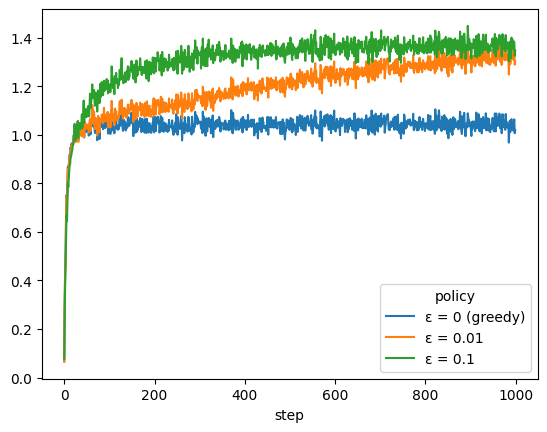

In [4]:
policy_names = {
    0: 'ε = 0.1',
    1: 'ε = 0.01',
    2: 'ε = 0 (greedy)'
}

(
    trace_df
    .assign(policy=trace_df.policy_idx.map(policy_names))
    .groupby(['step', 'policy'])
    ['reward'].mean()
    .unstack()
    .plot()
)


## Controlling the evaluation loop

The `bandit.evaluate` function is useful for benchmarking. But in practice, you'll want to have control over your bandit policy. Indeed you'll want the freedom to pull arms (with the `pull` method) and update the policy (with the `update` method) at your discretion.

As an example, the following is a possible reimplementation of the `bandit.evaluate` function. Here we'll be measuring the rate at which each policy selects the optimal arm.

Note how the `pull` and `update` methods are used.

In [5]:
import copy

policies=[
    bandit.EpsilonGreedy(epsilon=0.1),
    bandit.EpsilonGreedy(epsilon=0.01),
    bandit.EpsilonGreedy(epsilon=0),
]

env = gym.make(
    'river_bandits/KArmedTestbed-v0',
    max_episode_steps=1000
)
n_episodes = 2000

trace = []

with tqdm(total=len(policies) * n_episodes * env._max_episode_steps, position=0) as progress:
    for policy in policies:
        for episode in range(n_episodes):
            episode_policy = policy.clone()
            episode_env = copy.deepcopy(env)
            episode_env.reset()
            step = 0
            while True:
                action = episode_policy.pull(range(episode_env.action_space.n))
                observation, reward, terminated, truncated, info = episode_env.step(action)
                best_action = observation
                episode_policy.update(action, reward)

                trace.append({
                    "episode": episode,
                    "step": step,
                    "policy": f"ε = {policy.epsilon}",
                    "is_action_optimal": action == best_action
                })
                step += 1
                progress.update()

                if terminated or truncated:
                    break

trace_df = pd.DataFrame(trace)


  0%|          | 0/6000000 [00:00<?, ?it/s]

  0%|          | 9903/6000000 [00:00<01:00, 99025.84it/s]

  0%|          | 20001/6000000 [00:00<00:59, 99987.76it/s]

  1%|          | 30166/6000000 [00:00<00:59, 100742.86it/s]

  1%|          | 40372/6000000 [00:00<00:58, 101259.60it/s]

  1%|          | 50528/6000000 [00:00<00:58, 101364.96it/s]

  1%|          | 60665/6000000 [00:00<00:59, 100657.44it/s]

  1%|          | 70847/6000000 [00:00<00:58, 101033.32it/s]

  1%|▏         | 80952/6000000 [00:00<00:59, 99277.59it/s] 

  2%|▏         | 91080/6000000 [00:00<00:59, 99892.41it/s]

  2%|▏         | 101230/6000000 [00:01<00:58, 100383.64it/s]

  2%|▏         | 111326/6000000 [00:01<00:58, 100556.00it/s]

  2%|▏         | 121470/6000000 [00:01<00:58, 100823.28it/s]

  2%|▏         | 131583/6000000 [00:01<00:58, 100913.87it/s]

  2%|▏         | 141734/6000000 [00:01<00:57, 101091.21it/s]

  3%|▎         | 151845/6000000 [00:01<00:57, 101060.64it/s]

  3%|▎         | 161978/6000000 [00:01<00:57, 101138.88it/s]

  3%|▎         | 172093/6000000 [00:01<00:57, 101109.88it/s]

  3%|▎         | 182205/6000000 [00:01<00:57, 101028.92it/s]

  3%|▎         | 192378/6000000 [00:01<00:57, 101239.03it/s]

  3%|▎         | 202503/6000000 [00:02<00:57, 101211.08it/s]

  4%|▎         | 212657/6000000 [00:02<00:57, 101309.54it/s]

  4%|▎         | 222789/6000000 [00:02<00:57, 101299.02it/s]

  4%|▍         | 232919/6000000 [00:02<00:57, 101134.67it/s]

  4%|▍         | 243033/6000000 [00:02<00:56, 101045.56it/s]

  4%|▍         | 253138/6000000 [00:02<00:56, 100979.71it/s]

  4%|▍         | 263248/6000000 [00:02<00:56, 101014.47it/s]

  5%|▍         | 273350/6000000 [00:02<00:56, 100951.39it/s]

  5%|▍         | 283446/6000000 [00:02<00:56, 100658.88it/s]

  5%|▍         | 293558/6000000 [00:02<00:56, 100794.54it/s]

  5%|▌         | 303649/6000000 [00:03<00:56, 100828.27it/s]

  5%|▌         | 313732/6000000 [00:03<00:56, 100610.66it/s]

  5%|▌         | 323794/6000000 [00:03<00:56, 100528.35it/s]

  6%|▌         | 333847/6000000 [00:03<00:57, 99153.92it/s] 

  6%|▌         | 343918/6000000 [00:03<00:56, 99614.74it/s]

  6%|▌         | 353887/6000000 [00:03<00:56, 99636.96it/s]

  6%|▌         | 363929/6000000 [00:03<00:56, 99869.25it/s]

  6%|▌         | 373939/6000000 [00:03<00:56, 99937.95it/s]

  6%|▋         | 383935/6000000 [00:03<00:56, 99935.02it/s]

  7%|▋         | 393930/6000000 [00:03<00:56, 99913.93it/s]

  7%|▋         | 403923/6000000 [00:04<00:56, 99912.14it/s]

  7%|▋         | 413926/6000000 [00:04<00:55, 99945.48it/s]

  7%|▋         | 423941/6000000 [00:04<00:55, 100006.25it/s]

  7%|▋         | 433947/6000000 [00:04<00:55, 100019.46it/s]

  7%|▋         | 443975/6000000 [00:04<00:55, 100094.83it/s]

  8%|▊         | 454001/6000000 [00:04<00:55, 100016.09it/s]

  8%|▊         | 464078/6000000 [00:04<00:55, 100241.47it/s]

  8%|▊         | 474156/6000000 [00:04<00:55, 100401.78it/s]

  8%|▊         | 484197/6000000 [00:04<00:55, 99722.27it/s] 

  8%|▊         | 494196/6000000 [00:04<00:55, 99801.78it/s]

  8%|▊         | 504318/6000000 [00:05<00:54, 100225.23it/s]

  9%|▊         | 514479/6000000 [00:05<00:54, 100638.99it/s]

  9%|▊         | 524637/6000000 [00:05<00:54, 100918.15it/s]

  9%|▉         | 534790/6000000 [00:05<00:54, 101100.85it/s]

  9%|▉         | 544959/6000000 [00:05<00:53, 101276.82it/s]

  9%|▉         | 555087/6000000 [00:05<00:53, 101134.30it/s]

  9%|▉         | 565234/6000000 [00:05<00:53, 101232.29it/s]

 10%|▉         | 575368/6000000 [00:05<00:53, 101262.58it/s]

 10%|▉         | 585502/6000000 [00:05<00:53, 101283.50it/s]

 10%|▉         | 595631/6000000 [00:05<00:54, 99700.42it/s] 

 10%|█         | 605761/6000000 [00:06<00:53, 100173.94it/s]

 10%|█         | 615876/6000000 [00:06<00:53, 100464.09it/s]

 10%|█         | 626011/6000000 [00:06<00:53, 100725.32it/s]

 11%|█         | 636198/6000000 [00:06<00:53, 101066.32it/s]

 11%|█         | 646378/6000000 [00:06<00:52, 101285.04it/s]

 11%|█         | 656508/6000000 [00:06<00:52, 101184.38it/s]

 11%|█         | 666628/6000000 [00:06<00:52, 100700.05it/s]

 11%|█▏        | 676702/6000000 [00:06<00:52, 100711.00it/s]

 11%|█▏        | 686774/6000000 [00:06<00:52, 100520.76it/s]

 12%|█▏        | 696856/6000000 [00:06<00:52, 100609.51it/s]

 12%|█▏        | 706918/6000000 [00:07<00:52, 100609.23it/s]

 12%|█▏        | 717001/6000000 [00:07<00:52, 100617.76it/s]

 12%|█▏        | 727096/6000000 [00:07<00:52, 100714.34it/s]

 12%|█▏        | 737211/6000000 [00:07<00:52, 100844.48it/s]

 12%|█▏        | 747296/6000000 [00:07<00:52, 100831.24it/s]

 13%|█▎        | 757380/6000000 [00:07<00:52, 100714.76it/s]

 13%|█▎        | 767452/6000000 [00:07<00:51, 100682.20it/s]

 13%|█▎        | 777521/6000000 [00:07<00:51, 100597.75it/s]

 13%|█▎        | 787581/6000000 [00:07<00:51, 100546.03it/s]

 13%|█▎        | 797636/6000000 [00:07<00:52, 98759.00it/s] 

 13%|█▎        | 807708/6000000 [00:08<00:52, 99338.43it/s]

 14%|█▎        | 817766/6000000 [00:08<00:51, 99705.35it/s]

 14%|█▍        | 827811/6000000 [00:08<00:51, 99926.37it/s]

 14%|█▍        | 837856/6000000 [00:08<00:51, 100080.83it/s]

 14%|█▍        | 847993/6000000 [00:08<00:51, 100464.76it/s]

 14%|█▍        | 858042/6000000 [00:08<00:51, 100328.15it/s]

 14%|█▍        | 868196/6000000 [00:08<00:50, 100688.55it/s]

 15%|█▍        | 878332/6000000 [00:08<00:50, 100886.83it/s]

 15%|█▍        | 888438/6000000 [00:08<00:50, 100937.95it/s]

 15%|█▍        | 898533/6000000 [00:08<00:50, 100902.37it/s]

 15%|█▌        | 908624/6000000 [00:09<00:50, 100687.54it/s]

 15%|█▌        | 918732/6000000 [00:09<00:50, 100804.83it/s]

 15%|█▌        | 928838/6000000 [00:09<00:50, 100880.79it/s]

 16%|█▌        | 938927/6000000 [00:09<00:50, 100630.64it/s]

 16%|█▌        | 949001/6000000 [00:09<00:50, 100558.00it/s]

 16%|█▌        | 959090/6000000 [00:09<00:50, 100655.94it/s]

 16%|█▌        | 969284/6000000 [00:09<00:49, 101038.50it/s]

 16%|█▋        | 979446/6000000 [00:09<00:49, 101210.16it/s]

 16%|█▋        | 989597/6000000 [00:09<00:49, 101291.30it/s]

 17%|█▋        | 999727/6000000 [00:09<00:50, 99473.06it/s] 

 17%|█▋        | 1009905/6000000 [00:10<00:49, 100154.60it/s]

 17%|█▋        | 1020001/6000000 [00:10<00:49, 100297.92it/s]

 17%|█▋        | 1030120/6000000 [00:10<00:49, 100563.16it/s]

 17%|█▋        | 1040271/6000000 [00:10<00:49, 100844.31it/s]

 18%|█▊        | 1050365/6000000 [00:10<00:49, 100872.80it/s]

 18%|█▊        | 1060496/6000000 [00:10<00:48, 101001.14it/s]

 18%|█▊        | 1070598/6000000 [00:10<00:48, 100939.22it/s]

 18%|█▊        | 1080742/6000000 [00:10<00:48, 101088.86it/s]

 18%|█▊        | 1090888/6000000 [00:10<00:48, 101198.29it/s]

 18%|█▊        | 1101009/6000000 [00:10<00:48, 100630.32it/s]

 19%|█▊        | 1111117/6000000 [00:11<00:48, 100764.35it/s]

 19%|█▊        | 1121290/6000000 [00:11<00:48, 101052.29it/s]

 19%|█▉        | 1131405/6000000 [00:11<00:48, 101079.54it/s]

 19%|█▉        | 1141518/6000000 [00:11<00:48, 101093.46it/s]

 19%|█▉        | 1151628/6000000 [00:11<00:48, 101000.56it/s]

 19%|█▉        | 1161729/6000000 [00:11<00:47, 100923.33it/s]

 20%|█▉        | 1171849/6000000 [00:11<00:47, 101005.58it/s]

 20%|█▉        | 1181951/6000000 [00:11<00:47, 101008.27it/s]

 20%|█▉        | 1192052/6000000 [00:11<00:47, 100615.90it/s]

 20%|██        | 1202114/6000000 [00:11<00:47, 100614.14it/s]

 20%|██        | 1212176/6000000 [00:12<00:47, 100315.77it/s]

 20%|██        | 1222208/6000000 [00:12<00:47, 100225.00it/s]

 21%|██        | 1232231/6000000 [00:12<00:47, 100166.32it/s]

 21%|██        | 1242248/6000000 [00:12<00:47, 100108.89it/s]

 21%|██        | 1252259/6000000 [00:12<00:47, 99918.73it/s] 

 21%|██        | 1262251/6000000 [00:12<00:47, 99690.64it/s]

 21%|██        | 1272221/6000000 [00:12<00:47, 99303.89it/s]

 21%|██▏       | 1282152/6000000 [00:12<00:47, 99258.43it/s]

 22%|██▏       | 1292105/6000000 [00:12<00:47, 99339.10it/s]

 22%|██▏       | 1302040/6000000 [00:12<00:48, 97258.39it/s]

 22%|██▏       | 1312001/6000000 [00:13<00:47, 97833.13it/s]

 22%|██▏       | 1322001/6000000 [00:13<00:47, 98301.73it/s]

 22%|██▏       | 1331914/6000000 [00:13<00:47, 98547.24it/s]

 22%|██▏       | 1341802/6000000 [00:13<00:47, 98645.06it/s]

 23%|██▎       | 1351670/6000000 [00:13<00:47, 98638.88it/s]

 23%|██▎       | 1361636/6000000 [00:13<00:46, 98942.37it/s]

 23%|██▎       | 1371556/6000000 [00:13<00:46, 99019.07it/s]

 23%|██▎       | 1381460/6000000 [00:13<00:46, 98928.95it/s]

 23%|██▎       | 1391382/6000000 [00:13<00:46, 99013.30it/s]

 23%|██▎       | 1401284/6000000 [00:13<00:47, 97055.94it/s]

 24%|██▎       | 1411240/6000000 [00:14<00:46, 97794.21it/s]

 24%|██▎       | 1421165/6000000 [00:14<00:46, 98224.94it/s]

 24%|██▍       | 1431163/6000000 [00:14<00:46, 98745.78it/s]

 24%|██▍       | 1441157/6000000 [00:14<00:46, 99100.60it/s]

 24%|██▍       | 1451088/6000000 [00:14<00:45, 99163.15it/s]

 24%|██▍       | 1461041/6000000 [00:14<00:45, 99269.90it/s]

 25%|██▍       | 1471004/6000000 [00:14<00:45, 99374.93it/s]

 25%|██▍       | 1480963/6000000 [00:14<00:45, 99437.19it/s]

 25%|██▍       | 1490957/6000000 [00:14<00:45, 99585.86it/s]

 25%|██▌       | 1500917/6000000 [00:14<00:45, 99537.12it/s]

 25%|██▌       | 1510872/6000000 [00:15<00:45, 99315.94it/s]

 25%|██▌       | 1520825/6000000 [00:15<00:45, 99378.42it/s]

 26%|██▌       | 1530824/6000000 [00:15<00:44, 99561.00it/s]

 26%|██▌       | 1540781/6000000 [00:15<00:44, 99493.35it/s]

 26%|██▌       | 1550731/6000000 [00:15<00:44, 99244.26it/s]

 26%|██▌       | 1560656/6000000 [00:15<00:44, 99201.49it/s]

 26%|██▌       | 1570665/6000000 [00:15<00:44, 99465.79it/s]

 26%|██▋       | 1580612/6000000 [00:15<00:44, 99340.30it/s]

 27%|██▋       | 1590547/6000000 [00:15<00:44, 99118.16it/s]

 27%|██▋       | 1600459/6000000 [00:15<00:44, 98923.25it/s]

 27%|██▋       | 1610364/6000000 [00:16<00:44, 98958.21it/s]

 27%|██▋       | 1620260/6000000 [00:16<00:44, 98928.85it/s]

 27%|██▋       | 1630217/6000000 [00:16<00:44, 99119.51it/s]

 27%|██▋       | 1640130/6000000 [00:16<00:44, 99083.26it/s]

 28%|██▊       | 1650047/6000000 [00:16<00:43, 99108.07it/s]

 28%|██▊       | 1660001/6000000 [00:16<00:43, 99170.10it/s]

 28%|██▊       | 1669964/6000000 [00:16<00:43, 99306.32it/s]

 28%|██▊       | 1679895/6000000 [00:16<00:43, 99214.84it/s]

 28%|██▊       | 1689817/6000000 [00:16<00:43, 99148.06it/s]

 28%|██▊       | 1699732/6000000 [00:16<00:43, 99067.01it/s]

 28%|██▊       | 1709646/6000000 [00:17<00:43, 99087.84it/s]

 29%|██▊       | 1719555/6000000 [00:17<00:43, 99052.14it/s]

 29%|██▉       | 1729461/6000000 [00:17<00:43, 98837.00it/s]

 29%|██▉       | 1739412/6000000 [00:17<00:43, 99036.71it/s]

 29%|██▉       | 1749374/6000000 [00:17<00:42, 99209.04it/s]

 29%|██▉       | 1759320/6000000 [00:17<00:42, 99283.00it/s]

 29%|██▉       | 1769249/6000000 [00:17<00:42, 99240.16it/s]

 30%|██▉       | 1779186/6000000 [00:17<00:42, 99278.47it/s]

 30%|██▉       | 1789135/6000000 [00:17<00:42, 99340.35it/s]

 30%|██▉       | 1799098/6000000 [00:17<00:42, 99425.67it/s]

 30%|███       | 1809041/6000000 [00:18<00:42, 98957.60it/s]

 30%|███       | 1819001/6000000 [00:18<00:42, 99007.90it/s]

 30%|███       | 1828962/6000000 [00:18<00:42, 99185.74it/s]

 31%|███       | 1838881/6000000 [00:18<00:41, 99080.50it/s]

 31%|███       | 1848808/6000000 [00:18<00:41, 99136.25it/s]

 31%|███       | 1858732/6000000 [00:18<00:41, 99167.07it/s]

 31%|███       | 1868649/6000000 [00:18<00:41, 98877.38it/s]

 31%|███▏      | 1878537/6000000 [00:18<00:41, 98800.61it/s]

 31%|███▏      | 1888418/6000000 [00:18<00:41, 98669.49it/s]

 32%|███▏      | 1898307/6000000 [00:18<00:41, 98732.67it/s]

 32%|███▏      | 1908181/6000000 [00:19<00:42, 96645.76it/s]

 32%|███▏      | 1918091/6000000 [00:19<00:41, 97370.02it/s]

 32%|███▏      | 1928038/6000000 [00:19<00:41, 97990.96it/s]

 32%|███▏      | 1937844/6000000 [00:19<00:41, 97951.84it/s]

 32%|███▏      | 1947733/6000000 [00:19<00:41, 98229.79it/s]

 33%|███▎      | 1957675/6000000 [00:19<00:41, 98583.53it/s]

 33%|███▎      | 1967610/6000000 [00:19<00:40, 98810.41it/s]

 33%|███▎      | 1977493/6000000 [00:19<00:40, 98797.41it/s]

 33%|███▎      | 1987401/6000000 [00:19<00:40, 98880.24it/s]

 33%|███▎      | 1997382/6000000 [00:19<00:40, 99156.61it/s]

 33%|███▎      | 2007299/6000000 [00:20<00:41, 95302.50it/s]

 34%|███▎      | 2016862/6000000 [00:20<00:42, 94786.23it/s]

 34%|███▍      | 2026363/6000000 [00:20<00:42, 94173.57it/s]

 34%|███▍      | 2035849/6000000 [00:20<00:42, 94374.45it/s]

 34%|███▍      | 2045298/6000000 [00:20<00:42, 93605.70it/s]

 34%|███▍      | 2054705/6000000 [00:20<00:42, 93742.07it/s]

 34%|███▍      | 2064086/6000000 [00:20<00:42, 93271.33it/s]

 35%|███▍      | 2073418/6000000 [00:20<00:42, 93016.28it/s]

 35%|███▍      | 2082865/6000000 [00:20<00:41, 93445.55it/s]

 35%|███▍      | 2092212/6000000 [00:21<00:41, 93097.38it/s]

 35%|███▌      | 2101524/6000000 [00:21<00:42, 91282.08it/s]

 35%|███▌      | 2110661/6000000 [00:21<00:43, 90370.10it/s]

 35%|███▌      | 2119902/6000000 [00:21<00:42, 90967.27it/s]

 35%|███▌      | 2129204/6000000 [00:21<00:42, 91570.52it/s]

 36%|███▌      | 2138558/6000000 [00:21<00:41, 92153.81it/s]

 36%|███▌      | 2147955/6000000 [00:21<00:41, 92691.73it/s]

 36%|███▌      | 2157228/6000000 [00:21<00:41, 92646.81it/s]

 36%|███▌      | 2166495/6000000 [00:21<00:41, 92466.88it/s]

 36%|███▋      | 2175776/6000000 [00:21<00:41, 92568.16it/s]

 36%|███▋      | 2185082/6000000 [00:22<00:41, 92714.44it/s]

 37%|███▋      | 2194355/6000000 [00:22<00:41, 92449.17it/s]

 37%|███▋      | 2203726/6000000 [00:22<00:40, 92825.86it/s]

 37%|███▋      | 2213010/6000000 [00:22<00:40, 92727.57it/s]

 37%|███▋      | 2222327/6000000 [00:22<00:40, 92858.87it/s]

 37%|███▋      | 2231614/6000000 [00:22<00:40, 92654.10it/s]

 37%|███▋      | 2240911/6000000 [00:22<00:40, 92747.31it/s]

 38%|███▊      | 2250340/6000000 [00:22<00:40, 93207.30it/s]

 38%|███▊      | 2259661/6000000 [00:22<00:40, 93186.57it/s]

 38%|███▊      | 2269001/6000000 [00:22<00:40, 93189.24it/s]

 38%|███▊      | 2278351/6000000 [00:23<00:39, 93280.64it/s]

 38%|███▊      | 2287680/6000000 [00:23<00:40, 90766.14it/s]

 38%|███▊      | 2297001/6000000 [00:23<00:40, 91362.87it/s]

 38%|███▊      | 2306263/6000000 [00:23<00:40, 91731.88it/s]

 39%|███▊      | 2315445/6000000 [00:23<00:40, 91604.59it/s]

 39%|███▊      | 2324695/6000000 [00:23<00:40, 91869.59it/s]

 39%|███▉      | 2334001/6000000 [00:23<00:39, 92060.59it/s]

 39%|███▉      | 2343211/6000000 [00:23<00:39, 91991.49it/s]

 39%|███▉      | 2352453/6000000 [00:23<00:39, 92118.38it/s]

 39%|███▉      | 2361777/6000000 [00:23<00:39, 92453.00it/s]

 40%|███▉      | 2371024/6000000 [00:24<00:39, 92199.38it/s]

 40%|███▉      | 2380245/6000000 [00:24<00:39, 90625.88it/s]

 40%|███▉      | 2389607/6000000 [00:24<00:39, 91509.10it/s]

 40%|███▉      | 2398962/6000000 [00:24<00:39, 92113.99it/s]

 40%|████      | 2408178/6000000 [00:24<00:39, 91799.29it/s]

 40%|████      | 2417384/6000000 [00:24<00:38, 91874.59it/s]

 40%|████      | 2426574/6000000 [00:24<00:39, 91403.44it/s]

 41%|████      | 2435793/6000000 [00:24<00:38, 91636.27it/s]

 41%|████      | 2445092/6000000 [00:24<00:38, 92039.73it/s]

 41%|████      | 2454329/6000000 [00:24<00:38, 92137.62it/s]

 41%|████      | 2463637/6000000 [00:25<00:38, 92419.51it/s]

 41%|████      | 2472880/6000000 [00:25<00:38, 92356.87it/s]

 41%|████▏     | 2482117/6000000 [00:25<00:38, 92206.64it/s]

 42%|████▏     | 2491425/6000000 [00:25<00:37, 92466.73it/s]

 42%|████▏     | 2500722/6000000 [00:25<00:37, 92616.89it/s]

 42%|████▏     | 2509984/6000000 [00:25<00:37, 92171.66it/s]

 42%|████▏     | 2519202/6000000 [00:25<00:37, 92035.93it/s]

 42%|████▏     | 2528434/6000000 [00:25<00:37, 92120.05it/s]

 42%|████▏     | 2537647/6000000 [00:25<00:37, 92041.32it/s]

 42%|████▏     | 2546865/6000000 [00:25<00:37, 92080.81it/s]

 43%|████▎     | 2556074/6000000 [00:26<00:37, 91996.23it/s]

 43%|████▎     | 2565274/6000000 [00:26<00:38, 89617.02it/s]

 43%|████▎     | 2574535/6000000 [00:26<00:37, 90496.39it/s]

 43%|████▎     | 2583718/6000000 [00:26<00:37, 90890.14it/s]

 43%|████▎     | 2592932/6000000 [00:26<00:37, 91260.38it/s]

 43%|████▎     | 2602145/6000000 [00:26<00:37, 91516.78it/s]

 44%|████▎     | 2611498/6000000 [00:26<00:36, 92117.28it/s]

 44%|████▎     | 2620823/6000000 [00:26<00:36, 92455.18it/s]

 44%|████▍     | 2630072/6000000 [00:26<00:36, 92206.53it/s]

 44%|████▍     | 2639429/6000000 [00:26<00:36, 92612.27it/s]

 44%|████▍     | 2648716/6000000 [00:27<00:36, 92686.24it/s]

 44%|████▍     | 2657986/6000000 [00:27<00:36, 92372.18it/s]

 44%|████▍     | 2667225/6000000 [00:27<00:36, 92257.35it/s]

 45%|████▍     | 2676452/6000000 [00:27<00:36, 92227.44it/s]

 45%|████▍     | 2685738/6000000 [00:27<00:35, 92415.20it/s]

 45%|████▍     | 2695001/6000000 [00:27<00:35, 92474.00it/s]

 45%|████▌     | 2704249/6000000 [00:27<00:35, 92326.72it/s]

 45%|████▌     | 2713482/6000000 [00:27<00:35, 92297.29it/s]

 45%|████▌     | 2722802/6000000 [00:27<00:35, 92563.64it/s]

 46%|████▌     | 2732188/6000000 [00:27<00:35, 92949.91it/s]

 46%|████▌     | 2741484/6000000 [00:28<00:35, 92610.27it/s]

 46%|████▌     | 2750746/6000000 [00:28<00:35, 91767.81it/s]

 46%|████▌     | 2759925/6000000 [00:28<00:35, 90882.22it/s]

 46%|████▌     | 2769160/6000000 [00:28<00:35, 91316.15it/s]

 46%|████▋     | 2778397/6000000 [00:28<00:35, 91627.59it/s]

 46%|████▋     | 2787757/6000000 [00:28<00:34, 92215.51it/s]

 47%|████▋     | 2797011/6000000 [00:28<00:34, 92310.28it/s]

 47%|████▋     | 2806350/6000000 [00:28<00:34, 92632.41it/s]

 47%|████▋     | 2815615/6000000 [00:28<00:34, 92441.10it/s]

 47%|████▋     | 2824905/6000000 [00:28<00:34, 92576.07it/s]

 47%|████▋     | 2834164/6000000 [00:29<00:34, 92402.99it/s]

 47%|████▋     | 2843427/6000000 [00:29<00:34, 92470.20it/s]

 48%|████▊     | 2852675/6000000 [00:29<00:34, 90908.71it/s]

 48%|████▊     | 2861977/6000000 [00:29<00:34, 91533.13it/s]

 48%|████▊     | 2871136/6000000 [00:29<00:34, 91441.98it/s]

 48%|████▊     | 2880536/6000000 [00:29<00:33, 92201.39it/s]

 48%|████▊     | 2889806/6000000 [00:29<00:33, 92349.30it/s]

 48%|████▊     | 2899136/6000000 [00:29<00:33, 92631.91it/s]

 48%|████▊     | 2908401/6000000 [00:29<00:33, 92595.14it/s]

 49%|████▊     | 2917662/6000000 [00:29<00:33, 92512.13it/s]

 49%|████▉     | 2926914/6000000 [00:30<00:33, 92361.84it/s]

 49%|████▉     | 2936151/6000000 [00:30<00:33, 92101.30it/s]

 49%|████▉     | 2945362/6000000 [00:30<00:33, 91181.92it/s]

 49%|████▉     | 2954920/6000000 [00:30<00:32, 92486.71it/s]

 49%|████▉     | 2964172/6000000 [00:30<00:32, 92488.97it/s]

 50%|████▉     | 2973514/6000000 [00:30<00:32, 92766.88it/s]

 50%|████▉     | 2982793/6000000 [00:30<00:32, 92689.18it/s]

 50%|████▉     | 2992063/6000000 [00:30<00:32, 92644.15it/s]

 50%|█████     | 3001329/6000000 [00:30<00:32, 92574.62it/s]

 50%|█████     | 3010730/6000000 [00:30<00:32, 93002.87it/s]

 50%|█████     | 3020031/6000000 [00:31<00:32, 92789.82it/s]

 50%|█████     | 3029311/6000000 [00:31<00:32, 92791.04it/s]

 51%|█████     | 3038591/6000000 [00:31<00:32, 92511.23it/s]

 51%|█████     | 3047943/6000000 [00:31<00:31, 92811.31it/s]

 51%|█████     | 3057225/6000000 [00:31<00:32, 91597.81it/s]

 51%|█████     | 3066509/6000000 [00:31<00:31, 91966.23it/s]

 51%|█████▏    | 3075709/6000000 [00:31<00:32, 90813.32it/s]

 51%|█████▏    | 3084906/6000000 [00:31<00:31, 91153.67it/s]

 52%|█████▏    | 3094193/6000000 [00:31<00:31, 91661.62it/s]

 52%|█████▏    | 3103467/6000000 [00:31<00:31, 91981.38it/s]

 52%|█████▏    | 3112839/6000000 [00:32<00:31, 92498.63it/s]

 52%|█████▏    | 3122091/6000000 [00:32<00:31, 92352.07it/s]

 52%|█████▏    | 3131328/6000000 [00:32<00:31, 91668.54it/s]

 52%|█████▏    | 3140570/6000000 [00:32<00:31, 91889.85it/s]

 52%|█████▏    | 3149806/6000000 [00:32<00:30, 92028.91it/s]

 53%|█████▎    | 3159106/6000000 [00:32<00:30, 92316.05it/s]

 53%|█████▎    | 3168339/6000000 [00:32<00:30, 91812.04it/s]

 53%|█████▎    | 3177668/6000000 [00:32<00:30, 92250.15it/s]

 53%|█████▎    | 3186993/6000000 [00:32<00:30, 92547.73it/s]

 53%|█████▎    | 3196256/6000000 [00:32<00:30, 92572.10it/s]

 53%|█████▎    | 3205514/6000000 [00:33<00:30, 92535.78it/s]

 54%|█████▎    | 3214793/6000000 [00:33<00:30, 92610.89it/s]

 54%|█████▎    | 3224055/6000000 [00:33<00:30, 91316.22it/s]

 54%|█████▍    | 3233332/6000000 [00:33<00:30, 91745.71it/s]

 54%|█████▍    | 3242544/6000000 [00:33<00:30, 91855.61it/s]

 54%|█████▍    | 3251807/6000000 [00:33<00:29, 92086.21it/s]

 54%|█████▍    | 3261155/6000000 [00:33<00:29, 92500.05it/s]

 55%|█████▍    | 3270407/6000000 [00:33<00:29, 92428.37it/s]

 55%|█████▍    | 3279651/6000000 [00:33<00:29, 92427.33it/s]

 55%|█████▍    | 3288895/6000000 [00:34<00:29, 92412.15it/s]

 55%|█████▍    | 3298293/6000000 [00:34<00:29, 92879.70it/s]

 55%|█████▌    | 3307582/6000000 [00:34<00:29, 92754.30it/s]

 55%|█████▌    | 3316858/6000000 [00:34<00:29, 92333.86it/s]

 55%|█████▌    | 3326238/6000000 [00:34<00:28, 92769.84it/s]

 56%|█████▌    | 3335640/6000000 [00:34<00:28, 93141.38it/s]

 56%|█████▌    | 3345001/6000000 [00:34<00:28, 93212.63it/s]

 56%|█████▌    | 3354434/6000000 [00:34<00:28, 93545.65it/s]

 56%|█████▌    | 3363789/6000000 [00:34<00:28, 92771.01it/s]

 56%|█████▌    | 3373115/6000000 [00:34<00:28, 92916.01it/s]

 56%|█████▋    | 3382550/6000000 [00:35<00:28, 93343.84it/s]

 57%|█████▋    | 3391886/6000000 [00:35<00:27, 93204.19it/s]

 57%|█████▋    | 3401208/6000000 [00:35<00:27, 93098.12it/s]

 57%|█████▋    | 3410542/6000000 [00:35<00:27, 93168.09it/s]

 57%|█████▋    | 3419867/6000000 [00:35<00:27, 93191.63it/s]

 57%|█████▋    | 3429187/6000000 [00:35<00:27, 92646.83it/s]

 57%|█████▋    | 3438508/6000000 [00:35<00:27, 92814.26it/s]

 57%|█████▋    | 3447791/6000000 [00:35<00:27, 92776.02it/s]

 58%|█████▊    | 3457070/6000000 [00:35<00:27, 92352.57it/s]

 58%|█████▊    | 3466313/6000000 [00:35<00:27, 92375.31it/s]

 58%|█████▊    | 3475552/6000000 [00:36<00:27, 92308.49it/s]

 58%|█████▊    | 3484865/6000000 [00:36<00:27, 92553.54it/s]

 58%|█████▊    | 3494168/6000000 [00:36<00:27, 92695.46it/s]

 58%|█████▊    | 3503582/6000000 [00:36<00:26, 93127.72it/s]

 59%|█████▊    | 3512973/6000000 [00:36<00:26, 93360.57it/s]

 59%|█████▊    | 3522310/6000000 [00:36<00:26, 93070.48it/s]

 59%|█████▉    | 3531678/6000000 [00:36<00:26, 93248.01it/s]

 59%|█████▉    | 3541004/6000000 [00:36<00:26, 92050.62it/s]

 59%|█████▉    | 3550343/6000000 [00:36<00:26, 92447.95it/s]

 59%|█████▉    | 3559742/6000000 [00:36<00:26, 92905.23it/s]

 59%|█████▉    | 3569035/6000000 [00:37<00:26, 92771.58it/s]

 60%|█████▉    | 3578314/6000000 [00:37<00:26, 92598.52it/s]

 60%|█████▉    | 3587606/6000000 [00:37<00:26, 92692.57it/s]

 60%|█████▉    | 3596877/6000000 [00:37<00:26, 92370.38it/s]

 60%|██████    | 3606115/6000000 [00:37<00:26, 91953.43it/s]

 60%|██████    | 3615312/6000000 [00:37<00:25, 91797.60it/s]

 60%|██████    | 3624554/6000000 [00:37<00:25, 91981.83it/s]

 61%|██████    | 3633907/6000000 [00:37<00:25, 92443.23it/s]

 61%|██████    | 3643204/6000000 [00:37<00:25, 92599.25it/s]

 61%|██████    | 3652465/6000000 [00:37<00:25, 92428.71it/s]

 61%|██████    | 3661720/6000000 [00:38<00:25, 92464.23it/s]

 61%|██████    | 3670967/6000000 [00:38<00:25, 92384.47it/s]

 61%|██████▏   | 3680260/6000000 [00:38<00:25, 92547.44it/s]

 61%|██████▏   | 3689515/6000000 [00:38<00:25, 92385.57it/s]

 62%|██████▏   | 3698868/6000000 [00:38<00:24, 92726.25it/s]

 62%|██████▏   | 3708141/6000000 [00:38<00:24, 92505.56it/s]

 62%|██████▏   | 3717397/6000000 [00:38<00:24, 92520.16it/s]

 62%|██████▏   | 3726667/6000000 [00:38<00:24, 92571.92it/s]

 62%|██████▏   | 3735925/6000000 [00:38<00:24, 92376.36it/s]

 62%|██████▏   | 3745175/6000000 [00:38<00:24, 92412.46it/s]

 63%|██████▎   | 3754417/6000000 [00:39<00:24, 92203.55it/s]

 63%|██████▎   | 3763787/6000000 [00:39<00:24, 92650.19it/s]

 63%|██████▎   | 3773087/6000000 [00:39<00:24, 92754.42it/s]

 63%|██████▎   | 3782363/6000000 [00:39<00:23, 92731.28it/s]

 63%|██████▎   | 3791637/6000000 [00:39<00:24, 89558.33it/s]

 63%|██████▎   | 3800863/6000000 [00:39<00:24, 90346.49it/s]

 64%|██████▎   | 3810122/6000000 [00:39<00:24, 91006.41it/s]

 64%|██████▎   | 3819455/6000000 [00:39<00:23, 91693.35it/s]

 64%|██████▍   | 3828846/6000000 [00:39<00:23, 92350.46it/s]

 64%|██████▍   | 3838281/6000000 [00:39<00:23, 92944.01it/s]

 64%|██████▍   | 3847646/6000000 [00:40<00:23, 93152.72it/s]

 64%|██████▍   | 3856966/6000000 [00:40<00:23, 93006.33it/s]

 64%|██████▍   | 3866270/6000000 [00:40<00:22, 92898.68it/s]

 65%|██████▍   | 3875690/6000000 [00:40<00:22, 93287.51it/s]

 65%|██████▍   | 3885021/6000000 [00:40<00:23, 90229.26it/s]

 65%|██████▍   | 3894367/6000000 [00:40<00:23, 91173.91it/s]

 65%|██████▌   | 3903555/6000000 [00:40<00:22, 91379.81it/s]

 65%|██████▌   | 3912787/6000000 [00:40<00:22, 91657.06it/s]

 65%|██████▌   | 3922034/6000000 [00:40<00:22, 91897.22it/s]

 66%|██████▌   | 3931356/6000000 [00:40<00:22, 92289.24it/s]

 66%|██████▌   | 3940590/6000000 [00:41<00:22, 92193.86it/s]

 66%|██████▌   | 3950001/6000000 [00:41<00:22, 92708.06it/s]

 66%|██████▌   | 3959352/6000000 [00:41<00:21, 92946.45it/s]

 66%|██████▌   | 3968649/6000000 [00:41<00:21, 92893.80it/s]

 66%|██████▋   | 3977940/6000000 [00:41<00:22, 90224.77it/s]

 66%|██████▋   | 3987242/6000000 [00:41<00:22, 91043.32it/s]

 67%|██████▋   | 3996661/6000000 [00:41<00:21, 91971.21it/s]

 67%|██████▋   | 4006001/6000000 [00:41<00:21, 92331.82it/s]

 67%|██████▋   | 4015680/6000000 [00:41<00:21, 93656.41it/s]

 67%|██████▋   | 4025171/6000000 [00:41<00:21, 94027.65it/s]

 67%|██████▋   | 4034850/6000000 [00:42<00:20, 94852.19it/s]

 67%|██████▋   | 4044379/6000000 [00:42<00:20, 94982.04it/s]

 68%|██████▊   | 4053962/6000000 [00:42<00:20, 95234.66it/s]

 68%|██████▊   | 4063685/6000000 [00:42<00:20, 95830.47it/s]

 68%|██████▊   | 4073270/6000000 [00:42<00:20, 95671.06it/s]

 68%|██████▊   | 4082839/6000000 [00:42<00:20, 95335.23it/s]

 68%|██████▊   | 4092374/6000000 [00:42<00:20, 95195.61it/s]

 68%|██████▊   | 4102128/6000000 [00:42<00:19, 95894.27it/s]

 69%|██████▊   | 4111719/6000000 [00:42<00:19, 95721.12it/s]

 69%|██████▊   | 4121292/6000000 [00:42<00:19, 95038.58it/s]

 69%|██████▉   | 4130998/6000000 [00:43<00:19, 95638.42it/s]

 69%|██████▉   | 4140609/6000000 [00:43<00:19, 95776.54it/s]

 69%|██████▉   | 4150188/6000000 [00:43<00:19, 95627.59it/s]

 69%|██████▉   | 4159783/6000000 [00:43<00:19, 95723.58it/s]

 69%|██████▉   | 4169356/6000000 [00:43<00:19, 95218.01it/s]

 70%|██████▉   | 4178893/6000000 [00:43<00:19, 95261.01it/s]

 70%|██████▉   | 4188420/6000000 [00:43<00:19, 95152.20it/s]

 70%|██████▉   | 4197936/6000000 [00:43<00:18, 94951.33it/s]

 70%|███████   | 4207585/6000000 [00:43<00:18, 95409.09it/s]

 70%|███████   | 4217250/6000000 [00:43<00:18, 95778.71it/s]

 70%|███████   | 4227048/6000000 [00:44<00:18, 96437.27it/s]

 71%|███████   | 4236767/6000000 [00:44<00:18, 96660.25it/s]

 71%|███████   | 4246434/6000000 [00:44<00:18, 96018.54it/s]

 71%|███████   | 4256129/6000000 [00:44<00:18, 96294.86it/s]

 71%|███████   | 4265870/6000000 [00:44<00:17, 96626.86it/s]

 71%|███████▏  | 4275534/6000000 [00:44<00:17, 96488.20it/s]

 71%|███████▏  | 4285184/6000000 [00:44<00:17, 96262.39it/s]

 72%|███████▏  | 4294811/6000000 [00:44<00:17, 96179.98it/s]

 72%|███████▏  | 4304430/6000000 [00:44<00:17, 96005.24it/s]

 72%|███████▏  | 4314031/6000000 [00:44<00:17, 95670.05it/s]

 72%|███████▏  | 4323599/6000000 [00:45<00:17, 95507.33it/s]

 72%|███████▏  | 4333150/6000000 [00:45<00:17, 95345.38it/s]

 72%|███████▏  | 4342981/6000000 [00:45<00:17, 96229.80it/s]

 73%|███████▎  | 4352605/6000000 [00:45<00:17, 95225.55it/s]

 73%|███████▎  | 4362130/6000000 [00:45<00:17, 94796.59it/s]

 73%|███████▎  | 4371612/6000000 [00:45<00:17, 91906.96it/s]

 73%|███████▎  | 4381269/6000000 [00:45<00:17, 93263.45it/s]

 73%|███████▎  | 4390843/6000000 [00:45<00:17, 93988.74it/s]

 73%|███████▎  | 4400288/6000000 [00:45<00:16, 94122.66it/s]

 73%|███████▎  | 4409772/6000000 [00:45<00:16, 94334.14it/s]

 74%|███████▎  | 4419322/6000000 [00:46<00:16, 94679.11it/s]

 74%|███████▍  | 4429053/6000000 [00:46<00:16, 95463.89it/s]

 74%|███████▍  | 4438660/6000000 [00:46<00:16, 95643.96it/s]

 74%|███████▍  | 4448229/6000000 [00:46<00:16, 95656.95it/s]

 74%|███████▍  | 4457797/6000000 [00:46<00:16, 95408.07it/s]

 74%|███████▍  | 4467340/6000000 [00:46<00:16, 95106.30it/s]

 75%|███████▍  | 4476992/6000000 [00:46<00:15, 95527.75it/s]

 75%|███████▍  | 4486621/6000000 [00:46<00:15, 95754.24it/s]

 75%|███████▍  | 4496223/6000000 [00:46<00:15, 95831.91it/s]

 75%|███████▌  | 4505811/6000000 [00:46<00:15, 95844.56it/s]

 75%|███████▌  | 4515396/6000000 [00:47<00:15, 95495.32it/s]

 75%|███████▌  | 4524947/6000000 [00:47<00:15, 95479.93it/s]

 76%|███████▌  | 4534511/6000000 [00:47<00:15, 95526.15it/s]

 76%|███████▌  | 4544115/6000000 [00:47<00:15, 95678.77it/s]

 76%|███████▌  | 4553684/6000000 [00:47<00:15, 95393.76it/s]

 76%|███████▌  | 4563224/6000000 [00:47<00:15, 91465.18it/s]

 76%|███████▌  | 4572749/6000000 [00:47<00:15, 92564.46it/s]

 76%|███████▋  | 4582242/6000000 [00:47<00:15, 93256.97it/s]

 77%|███████▋  | 4591828/6000000 [00:47<00:14, 94023.49it/s]

 77%|███████▋  | 4601316/6000000 [00:48<00:14, 94275.32it/s]

 77%|███████▋  | 4610755/6000000 [00:48<00:14, 94136.64it/s]

 77%|███████▋  | 4620259/6000000 [00:48<00:14, 94403.98it/s]

 77%|███████▋  | 4629915/6000000 [00:48<00:14, 95047.63it/s]

 77%|███████▋  | 4639433/6000000 [00:48<00:14, 95086.83it/s]

 77%|███████▋  | 4649318/6000000 [00:48<00:14, 96210.65it/s]

 78%|███████▊  | 4658942/6000000 [00:48<00:14, 92479.99it/s]

 78%|███████▊  | 4668223/6000000 [00:48<00:14, 92319.81it/s]

 78%|███████▊  | 4677754/6000000 [00:48<00:14, 93195.52it/s]

 78%|███████▊  | 4687205/6000000 [00:48<00:14, 93583.40it/s]

 78%|███████▊  | 4696841/6000000 [00:49<00:13, 94404.85it/s]

 78%|███████▊  | 4706292/6000000 [00:49<00:13, 94355.62it/s]

 79%|███████▊  | 4715913/6000000 [00:49<00:13, 94907.53it/s]

 79%|███████▉  | 4725456/6000000 [00:49<00:13, 95063.30it/s]

 79%|███████▉  | 4734967/6000000 [00:49<00:13, 94403.06it/s]

 79%|███████▉  | 4744457/6000000 [00:49<00:13, 94548.84it/s]

 79%|███████▉  | 4753915/6000000 [00:49<00:13, 94429.87it/s]

 79%|███████▉  | 4763435/6000000 [00:49<00:13, 94659.78it/s]

 80%|███████▉  | 4772903/6000000 [00:49<00:12, 94644.06it/s]

 80%|███████▉  | 4782369/6000000 [00:49<00:12, 94408.89it/s]

 80%|███████▉  | 4791811/6000000 [00:50<00:12, 94310.46it/s]

 80%|████████  | 4801287/6000000 [00:50<00:12, 94444.11it/s]

 80%|████████  | 4810732/6000000 [00:50<00:12, 94360.44it/s]

 80%|████████  | 4820271/6000000 [00:50<00:12, 94667.04it/s]

 80%|████████  | 4829915/6000000 [00:50<00:12, 95195.42it/s]

 81%|████████  | 4839435/6000000 [00:50<00:12, 94774.89it/s]

 81%|████████  | 4849053/6000000 [00:50<00:12, 95194.41it/s]

 81%|████████  | 4858862/6000000 [00:50<00:11, 96059.18it/s]

 81%|████████  | 4868528/6000000 [00:50<00:11, 96238.01it/s]

 81%|████████▏ | 4878153/6000000 [00:50<00:11, 96079.32it/s]

 81%|████████▏ | 4887872/6000000 [00:51<00:11, 96409.57it/s]

 82%|████████▏ | 4897727/6000000 [00:51<00:11, 97047.23it/s]

 82%|████████▏ | 4907433/6000000 [00:51<00:11, 96410.60it/s]

 82%|████████▏ | 4917076/6000000 [00:51<00:11, 95720.81it/s]

 82%|████████▏ | 4926870/6000000 [00:51<00:11, 96378.88it/s]

 82%|████████▏ | 4936510/6000000 [00:51<00:11, 96330.22it/s]

 82%|████████▏ | 4946145/6000000 [00:51<00:11, 95781.01it/s]

 83%|████████▎ | 4955725/6000000 [00:51<00:11, 93030.98it/s]

 83%|████████▎ | 4965060/6000000 [00:51<00:11, 93122.52it/s]

 83%|████████▎ | 4974608/6000000 [00:51<00:10, 93815.85it/s]

 83%|████████▎ | 4984148/6000000 [00:52<00:10, 94283.65it/s]

 83%|████████▎ | 4993710/6000000 [00:52<00:10, 94678.60it/s]

 83%|████████▎ | 5003269/6000000 [00:52<00:10, 94948.45it/s]

 84%|████████▎ | 5012864/6000000 [00:52<00:10, 95247.21it/s]

 84%|████████▎ | 5022680/6000000 [00:52<00:10, 96115.29it/s]

 84%|████████▍ | 5032306/6000000 [00:52<00:10, 96156.24it/s]

 84%|████████▍ | 5042001/6000000 [00:52<00:09, 96231.36it/s]

 84%|████████▍ | 5051626/6000000 [00:52<00:10, 94020.76it/s]

 84%|████████▍ | 5061095/6000000 [00:52<00:09, 94217.13it/s]

 85%|████████▍ | 5070645/6000000 [00:52<00:09, 94596.05it/s]

 85%|████████▍ | 5080186/6000000 [00:53<00:09, 94836.57it/s]

 85%|████████▍ | 5089675/6000000 [00:53<00:09, 94785.28it/s]

 85%|████████▍ | 5099157/6000000 [00:53<00:09, 94594.29it/s]

 85%|████████▌ | 5108773/6000000 [00:53<00:09, 95060.52it/s]

 85%|████████▌ | 5118281/6000000 [00:53<00:09, 94715.70it/s]

 85%|████████▌ | 5127755/6000000 [00:53<00:09, 94539.57it/s]

 86%|████████▌ | 5137219/6000000 [00:53<00:09, 94568.64it/s]

 86%|████████▌ | 5146677/6000000 [00:53<00:09, 94551.30it/s]

 86%|████████▌ | 5156154/6000000 [00:53<00:08, 94615.89it/s]

 86%|████████▌ | 5165787/6000000 [00:53<00:08, 95127.06it/s]

 86%|████████▋ | 5175365/6000000 [00:54<00:08, 95320.20it/s]

 86%|████████▋ | 5184898/6000000 [00:54<00:08, 94978.78it/s]

 87%|████████▋ | 5194427/6000000 [00:54<00:08, 95070.25it/s]

 87%|████████▋ | 5204004/6000000 [00:54<00:08, 95278.04it/s]

 87%|████████▋ | 5213544/6000000 [00:54<00:08, 95312.08it/s]

 87%|████████▋ | 5223076/6000000 [00:54<00:08, 95264.04it/s]

 87%|████████▋ | 5232785/6000000 [00:54<00:08, 95808.69it/s]

 87%|████████▋ | 5242367/6000000 [00:54<00:08, 91716.00it/s]

 88%|████████▊ | 5251860/6000000 [00:54<00:08, 92647.75it/s]

 88%|████████▊ | 5261393/6000000 [00:54<00:07, 93433.63it/s]

 88%|████████▊ | 5270970/6000000 [00:55<00:07, 94123.25it/s]

 88%|████████▊ | 5280768/6000000 [00:55<00:07, 95265.61it/s]

 88%|████████▊ | 5290308/6000000 [00:55<00:07, 95125.10it/s]

 88%|████████▊ | 5300001/6000000 [00:55<00:07, 95623.31it/s]

 88%|████████▊ | 5309656/6000000 [00:55<00:07, 95899.21it/s]

 89%|████████▊ | 5319251/6000000 [00:55<00:07, 95436.42it/s]

 89%|████████▉ | 5328896/6000000 [00:55<00:07, 95738.65it/s]

 89%|████████▉ | 5338473/6000000 [00:55<00:07, 91327.02it/s]

 89%|████████▉ | 5348079/6000000 [00:55<00:07, 92693.85it/s]

 89%|████████▉ | 5357601/6000000 [00:55<00:06, 93429.99it/s]

 89%|████████▉ | 5367079/6000000 [00:56<00:06, 93827.28it/s]

 90%|████████▉ | 5376533/6000000 [00:56<00:06, 94036.85it/s]

 90%|████████▉ | 5385958/6000000 [00:56<00:06, 94097.79it/s]

 90%|████████▉ | 5395503/6000000 [00:56<00:06, 94499.01it/s]

 90%|█████████ | 5405001/6000000 [00:56<00:06, 94594.67it/s]

 90%|█████████ | 5414655/6000000 [00:56<00:06, 95175.62it/s]

 90%|█████████ | 5424177/6000000 [00:56<00:06, 94876.84it/s]

 91%|█████████ | 5433668/6000000 [00:56<00:06, 94322.19it/s]

 91%|█████████ | 5443243/6000000 [00:56<00:05, 94747.05it/s]

 91%|█████████ | 5452794/6000000 [00:57<00:05, 94973.56it/s]

 91%|█████████ | 5462293/6000000 [00:57<00:05, 94789.52it/s]

 91%|█████████ | 5472001/6000000 [00:57<00:05, 95427.64it/s]

 91%|█████████▏| 5481663/6000000 [00:57<00:05, 95783.62it/s]

 92%|█████████▏| 5491243/6000000 [00:57<00:05, 95722.69it/s]

 92%|█████████▏| 5500816/6000000 [00:57<00:05, 95080.78it/s]

 92%|█████████▏| 5510527/6000000 [00:57<00:05, 95685.80it/s]

 92%|█████████▏| 5520097/6000000 [00:57<00:05, 95506.28it/s]

 92%|█████████▏| 5529697/6000000 [00:57<00:04, 95651.40it/s]

 92%|█████████▏| 5539263/6000000 [00:57<00:04, 92904.33it/s]

 92%|█████████▏| 5548824/6000000 [00:58<00:04, 93696.89it/s]

 93%|█████████▎| 5558476/6000000 [00:58<00:04, 94526.40it/s]

 93%|█████████▎| 5567991/6000000 [00:58<00:04, 94710.89it/s]

 93%|█████████▎| 5577673/6000000 [00:58<00:04, 95338.49it/s]

 93%|█████████▎| 5587316/6000000 [00:58<00:04, 95661.52it/s]

 93%|█████████▎| 5596901/6000000 [00:58<00:04, 95716.92it/s]

 93%|█████████▎| 5606476/6000000 [00:58<00:04, 95295.47it/s]

 94%|█████████▎| 5616009/6000000 [00:58<00:04, 94700.09it/s]

 94%|█████████▍| 5625748/6000000 [00:58<00:03, 95498.47it/s]

 94%|█████████▍| 5635301/6000000 [00:58<00:03, 92461.11it/s]

 94%|█████████▍| 5644896/6000000 [00:59<00:03, 93478.96it/s]

 94%|█████████▍| 5654298/6000000 [00:59<00:03, 93637.15it/s]

 94%|█████████▍| 5663684/6000000 [00:59<00:03, 93702.96it/s]

 95%|█████████▍| 5673064/6000000 [00:59<00:03, 93399.50it/s]

 95%|█████████▍| 5682540/6000000 [00:59<00:03, 93803.62it/s]

 95%|█████████▍| 5691992/6000000 [00:59<00:03, 94017.14it/s]

 95%|█████████▌| 5701502/6000000 [00:59<00:03, 94339.52it/s]

 95%|█████████▌| 5711186/6000000 [00:59<00:03, 95086.01it/s]

 95%|█████████▌| 5720834/6000000 [00:59<00:02, 95502.02it/s]

 96%|█████████▌| 5730386/6000000 [00:59<00:02, 92127.12it/s]

 96%|█████████▌| 5740028/6000000 [01:00<00:02, 93379.12it/s]

 96%|█████████▌| 5749582/6000000 [01:00<00:02, 94014.14it/s]

 96%|█████████▌| 5759001/6000000 [01:00<00:02, 93995.90it/s]

 96%|█████████▌| 5768670/6000000 [01:00<00:02, 94795.89it/s]

 96%|█████████▋| 5778159/6000000 [01:00<00:02, 94585.75it/s]

 96%|█████████▋| 5787624/6000000 [01:00<00:02, 94602.58it/s]

 97%|█████████▋| 5797149/6000000 [01:00<00:02, 94795.87it/s]

 97%|█████████▋| 5806663/6000000 [01:00<00:02, 94897.52it/s]

 97%|█████████▋| 5816155/6000000 [01:00<00:01, 94307.18it/s]

 97%|█████████▋| 5825594/6000000 [01:00<00:01, 94331.84it/s]

 97%|█████████▋| 5835106/6000000 [01:01<00:01, 94564.76it/s]

 97%|█████████▋| 5844758/6000000 [01:01<00:01, 95149.21it/s]

 98%|█████████▊| 5854274/6000000 [01:01<00:01, 94874.69it/s]

 98%|█████████▊| 5863993/6000000 [01:01<00:01, 95564.29it/s]

 98%|█████████▊| 5873551/6000000 [01:01<00:01, 95519.40it/s]

 98%|█████████▊| 5883104/6000000 [01:01<00:01, 95420.92it/s]

 98%|█████████▊| 5892962/6000000 [01:01<00:01, 96365.47it/s]

 98%|█████████▊| 5902600/6000000 [01:01<00:01, 95582.28it/s]

 99%|█████████▊| 5912160/6000000 [01:01<00:00, 95453.53it/s]

 99%|█████████▊| 5921707/6000000 [01:01<00:00, 93316.16it/s]

 99%|█████████▉| 5931271/6000000 [01:02<00:00, 93993.85it/s]

 99%|█████████▉| 5940769/6000000 [01:02<00:00, 94285.05it/s]

 99%|█████████▉| 5950284/6000000 [01:02<00:00, 94540.00it/s]

 99%|█████████▉| 5959986/6000000 [01:02<00:00, 95276.37it/s]

 99%|█████████▉| 5969518/6000000 [01:02<00:00, 94952.45it/s]

100%|█████████▉| 5979153/6000000 [01:02<00:00, 95368.05it/s]

100%|█████████▉| 5988878/6000000 [01:02<00:00, 95930.19it/s]

100%|█████████▉| 5998473/6000000 [01:02<00:00, 95313.35it/s]

100%|██████████| 6000000/6000000 [01:02<00:00, 95572.01it/s]

<Axes: xlabel='step'>

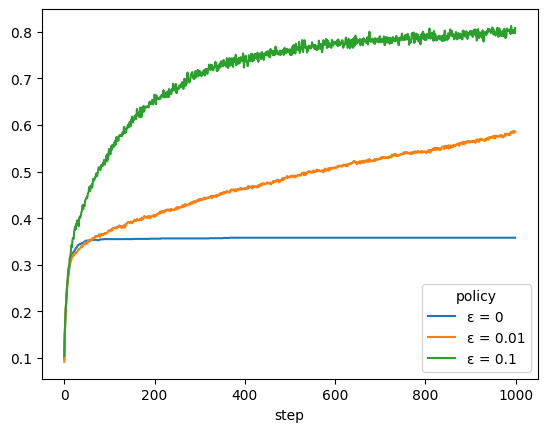

In [6]:
colors = {
    'ε = 0.1': 'tab:blue',
    'ε = 0.01': 'tab:red',
    'ε = 0': 'tab:green'
}

(
    trace_df
    .groupby(['step', 'policy'])
    ['is_action_optimal'].mean()
    .unstack()
    .plot()
)


## Handling drift

The environment used above is a toy situation used for introducing bandits. It is stationary, meaning that the expected reward of each arm does not change over time.

In practice, arms are dynamic, and their performance can vary over time. A simple example of this is the [Candy Cane Contest](https://www.kaggle.com/c/santa-2020) that was hosted on Kaggle in 2020. The expected reward of each arm diminishes each time it is pulled.

The way bandit policies in River deal with drift depends on the method. For the `bandit.EpsilonGreedy` policy, it makes sense to use a rolling average as the reward object. What this means is that the empirical reward the policy calculates for each arm is a rolling average, rather than a global one.

In [7]:
from river import proba, utils

policies=[
    bandit.EpsilonGreedy(
        epsilon=0.1,
        seed=42
    ),
    bandit.EpsilonGreedy(
        epsilon=0.3,
        reward_obj=utils.Rolling(stats.Mean(), window_size=50),
        seed=42
    ),
    bandit.ThompsonSampling(
        reward_obj=proba.Beta(),
        seed=42
    )
]

env = gym.make('river_bandits/CandyCaneContest-v0')

trace = bandit.evaluate(
    policies=policies,
    env=env,
    n_episodes=(n_episodes := 30),
    seed=42
)

trace_df = pd.DataFrame(tqdm(
    trace, position=0, total=(
        n_episodes *
        len(policies) *
        env._max_episode_steps
    )
))


  0%|          | 0/180000 [00:00<?, ?it/s]

  0%|          | 3/180000 [00:00<1:47:11, 27.99it/s]

  0%|          | 820/180000 [00:00<00:38, 4679.30it/s]

  1%|          | 1572/180000 [00:00<00:29, 5950.09it/s]

  1%|▏         | 2328/180000 [00:00<00:27, 6573.50it/s]

  2%|▏         | 3084/180000 [00:00<00:25, 6921.82it/s]

  2%|▏         | 3831/180000 [00:00<00:24, 7106.20it/s]

  3%|▎         | 4581/180000 [00:00<00:24, 7232.79it/s]

  3%|▎         | 5328/180000 [00:00<00:23, 7302.96it/s]

  3%|▎         | 6060/180000 [00:00<00:24, 7072.93it/s]

  4%|▍         | 6873/180000 [00:01<00:23, 7387.04it/s]

  4%|▍         | 7615/180000 [00:01<00:23, 7387.26it/s]

  5%|▍         | 8356/180000 [00:01<00:23, 7393.54it/s]

  5%|▌         | 9099/180000 [00:01<00:23, 7400.15it/s]

  5%|▌         | 9840/180000 [00:01<00:23, 7388.73it/s]

  6%|▌         | 10580/180000 [00:01<00:22, 7390.72it/s]

  6%|▋         | 11320/180000 [00:01<00:23, 7053.48it/s]

  7%|▋         | 12029/180000 [00:01<00:24, 6838.43it/s]

  7%|▋         | 12837/180000 [00:01<00:23, 7193.44it/s]

  8%|▊         | 13569/180000 [00:01<00:23, 7225.01it/s]

  8%|▊         | 14305/180000 [00:02<00:22, 7264.11it/s]

  8%|▊         | 15042/180000 [00:02<00:22, 7289.85it/s]

  9%|▉         | 15775/180000 [00:02<00:22, 7300.98it/s]

  9%|▉         | 16509/180000 [00:02<00:22, 7311.55it/s]

 10%|▉         | 17241/180000 [00:02<00:22, 7298.92it/s]

 10%|▉         | 17981/180000 [00:02<00:22, 7328.34it/s]

 10%|█         | 18715/180000 [00:02<00:22, 7181.00it/s]

 11%|█         | 19452/180000 [00:02<00:22, 7231.80it/s]

 11%|█         | 20190/180000 [00:02<00:21, 7272.11it/s]

 12%|█▏        | 20919/180000 [00:02<00:21, 7276.76it/s]

 12%|█▏        | 21657/180000 [00:03<00:21, 7304.54it/s]

 12%|█▏        | 22388/180000 [00:03<00:21, 7293.77it/s]

 13%|█▎        | 23120/180000 [00:03<00:21, 7300.22it/s]

 13%|█▎        | 23853/180000 [00:03<00:21, 7304.96it/s]

 14%|█▎        | 24584/180000 [00:03<00:21, 7157.78it/s]

 14%|█▍        | 25309/180000 [00:03<00:21, 7184.45it/s]

 14%|█▍        | 26034/180000 [00:03<00:21, 7198.88it/s]

 15%|█▍        | 26760/180000 [00:03<00:21, 7214.63it/s]

 15%|█▌        | 27488/180000 [00:03<00:21, 7233.11it/s]

 16%|█▌        | 28212/180000 [00:03<00:20, 7228.73it/s]

 16%|█▌        | 28936/180000 [00:04<00:20, 7230.67it/s]

 16%|█▋        | 29661/180000 [00:04<00:20, 7229.87it/s]

 17%|█▋        | 30385/180000 [00:04<00:21, 7087.92it/s]

 17%|█▋        | 31146/180000 [00:04<00:20, 7236.00it/s]

 18%|█▊        | 31893/180000 [00:04<00:20, 7303.60it/s]

 18%|█▊        | 32628/180000 [00:04<00:20, 7314.42it/s]

 19%|█▊        | 33363/180000 [00:04<00:20, 7323.13it/s]

 19%|█▉        | 34096/180000 [00:04<00:19, 7305.83it/s]

 19%|█▉        | 34827/180000 [00:04<00:19, 7303.89it/s]

 20%|█▉        | 35558/180000 [00:04<00:19, 7303.52it/s]

 20%|██        | 36289/180000 [00:05<00:20, 7102.29it/s]

 21%|██        | 37056/180000 [00:05<00:19, 7265.26it/s]

 21%|██        | 37797/180000 [00:05<00:19, 7302.12it/s]

 21%|██▏       | 38535/180000 [00:05<00:19, 7323.78it/s]

 22%|██▏       | 39276/180000 [00:05<00:19, 7344.15it/s]

 22%|██▏       | 40020/180000 [00:05<00:19, 7367.27it/s]

 23%|██▎       | 40764/180000 [00:05<00:18, 7385.38it/s]

 23%|██▎       | 41503/180000 [00:05<00:19, 7093.16it/s]

 23%|██▎       | 42215/180000 [00:05<00:19, 6959.85it/s]

 24%|██▍       | 42987/180000 [00:06<00:19, 7174.59it/s]

 24%|██▍       | 43733/180000 [00:06<00:18, 7257.30it/s]

 25%|██▍       | 44472/180000 [00:06<00:18, 7290.17it/s]

 25%|██▌       | 45214/180000 [00:06<00:18, 7327.67it/s]

 26%|██▌       | 45954/180000 [00:06<00:18, 7347.47it/s]

 26%|██▌       | 46693/180000 [00:06<00:18, 7359.77it/s]

 26%|██▋       | 47431/180000 [00:06<00:18, 7364.59it/s]

 27%|██▋       | 48168/180000 [00:06<00:18, 7118.55it/s]

 27%|██▋       | 48945/180000 [00:06<00:17, 7303.27it/s]

 28%|██▊       | 49678/180000 [00:06<00:17, 7300.99it/s]

 28%|██▊       | 50410/180000 [00:07<00:17, 7295.11it/s]

 28%|██▊       | 51150/180000 [00:07<00:17, 7322.71it/s]

 29%|██▉       | 51885/180000 [00:07<00:17, 7327.85it/s]

 29%|██▉       | 52623/180000 [00:07<00:17, 7337.21it/s]

 30%|██▉       | 53358/180000 [00:07<00:17, 7312.89it/s]

 30%|███       | 54090/180000 [00:07<00:17, 7069.66it/s]

 30%|███       | 54879/180000 [00:07<00:17, 7303.12it/s]

 31%|███       | 55612/180000 [00:07<00:17, 7297.44it/s]

 31%|███▏      | 56344/180000 [00:07<00:17, 7271.74it/s]

 32%|███▏      | 57081/180000 [00:07<00:16, 7300.27it/s]

 32%|███▏      | 57814/180000 [00:08<00:16, 7308.47it/s]

 33%|███▎      | 58546/180000 [00:08<00:16, 7307.45it/s]

 33%|███▎      | 59278/180000 [00:08<00:16, 7303.04it/s]

 33%|███▎      | 60009/180000 [00:08<00:17, 7002.51it/s]

 34%|███▍      | 60804/180000 [00:08<00:16, 7275.77it/s]

 34%|███▍      | 61541/180000 [00:08<00:16, 7302.71it/s]

 35%|███▍      | 62274/180000 [00:08<00:16, 7309.31it/s]

 35%|███▌      | 63014/180000 [00:08<00:15, 7335.71it/s]

 35%|███▌      | 63749/180000 [00:08<00:15, 7325.02it/s]

 36%|███▌      | 64484/180000 [00:08<00:15, 7332.28it/s]

 36%|███▌      | 65228/180000 [00:09<00:15, 7363.79it/s]

 37%|███▋      | 65965/180000 [00:09<00:15, 7353.63it/s]

 37%|███▋      | 66701/180000 [00:09<00:15, 7168.57it/s]

 37%|███▋      | 67435/180000 [00:09<00:15, 7217.53it/s]

 38%|███▊      | 68169/180000 [00:09<00:15, 7253.64it/s]

 38%|███▊      | 68901/180000 [00:09<00:15, 7272.82it/s]

 39%|███▊      | 69637/180000 [00:09<00:15, 7297.51it/s]

 39%|███▉      | 70368/180000 [00:09<00:15, 7294.75it/s]

 39%|███▉      | 71098/180000 [00:09<00:14, 7261.11it/s]

 40%|███▉      | 71834/180000 [00:09<00:14, 7290.37it/s]

 40%|████      | 72564/180000 [00:10<00:15, 7144.77it/s]

 41%|████      | 73311/180000 [00:10<00:14, 7236.02it/s]

 41%|████      | 74046/180000 [00:10<00:14, 7264.29it/s]

 42%|████▏     | 74784/180000 [00:10<00:14, 7293.30it/s]

 42%|████▏     | 75518/180000 [00:10<00:14, 7307.15it/s]

 42%|████▏     | 76249/180000 [00:10<00:14, 7293.15it/s]

 43%|████▎     | 76979/180000 [00:10<00:14, 7289.96it/s]

 43%|████▎     | 77712/180000 [00:10<00:14, 7301.13it/s]

 44%|████▎     | 78443/180000 [00:10<00:14, 7131.94it/s]

 44%|████▍     | 79182/180000 [00:10<00:13, 7203.31it/s]

 44%|████▍     | 79917/180000 [00:11<00:13, 7242.02it/s]

 45%|████▍     | 80649/180000 [00:11<00:13, 7263.73it/s]

 45%|████▌     | 81376/180000 [00:11<00:13, 7264.74it/s]

 46%|████▌     | 82107/180000 [00:11<00:13, 7275.65it/s]

 46%|████▌     | 82836/180000 [00:11<00:13, 7275.01it/s]

 46%|████▋     | 83568/180000 [00:11<00:13, 7286.67it/s]

 47%|████▋     | 84297/180000 [00:11<00:13, 7107.48it/s]

 47%|████▋     | 85063/180000 [00:11<00:13, 7269.33it/s]

 48%|████▊     | 85791/180000 [00:11<00:12, 7267.43it/s]

 48%|████▊     | 86519/180000 [00:11<00:12, 7240.81it/s]

 48%|████▊     | 87247/180000 [00:12<00:12, 7251.94it/s]

 49%|████▉     | 87973/180000 [00:12<00:12, 7252.42it/s]

 49%|████▉     | 88699/180000 [00:12<00:12, 7254.10it/s]

 50%|████▉     | 89430/180000 [00:12<00:12, 7267.26it/s]

 50%|█████     | 90157/180000 [00:12<00:12, 7042.05it/s]

 51%|█████     | 90930/180000 [00:12<00:12, 7243.05it/s]

 51%|█████     | 91665/180000 [00:12<00:12, 7273.28it/s]

 51%|█████▏    | 92403/180000 [00:12<00:11, 7303.36it/s]

 52%|█████▏    | 93142/180000 [00:12<00:11, 7328.27it/s]

 52%|█████▏    | 93876/180000 [00:13<00:11, 7229.73it/s]

 53%|█████▎    | 94600/180000 [00:13<00:11, 7221.96it/s]

 53%|█████▎    | 95337/180000 [00:13<00:11, 7261.76it/s]

 53%|█████▎    | 96064/180000 [00:13<00:11, 7001.16it/s]

 54%|█████▍    | 96852/180000 [00:13<00:11, 7251.73it/s]

 54%|█████▍    | 97586/180000 [00:13<00:11, 7277.05it/s]

 55%|█████▍    | 98319/180000 [00:13<00:11, 7291.03it/s]

 55%|█████▌    | 99052/180000 [00:13<00:11, 7300.77it/s]

 55%|█████▌    | 99785/180000 [00:13<00:10, 7309.34it/s]

 56%|█████▌    | 100517/180000 [00:13<00:10, 7312.20it/s]

 56%|█████▌    | 101249/180000 [00:14<00:10, 7304.70it/s]

 57%|█████▋    | 101980/180000 [00:14<00:10, 7304.29it/s]

 57%|█████▋    | 102711/180000 [00:14<00:10, 7183.88it/s]

 57%|█████▋    | 103449/180000 [00:14<00:10, 7234.23it/s]

 58%|█████▊    | 104178/180000 [00:14<00:10, 7244.66it/s]

 58%|█████▊    | 104903/180000 [00:14<00:10, 7242.74it/s]

 59%|█████▊    | 105628/180000 [00:14<00:10, 7237.36it/s]

 59%|█████▉    | 106353/180000 [00:14<00:10, 7237.20it/s]

 59%|█████▉    | 107080/180000 [00:14<00:10, 7246.76it/s]

 60%|█████▉    | 107808/180000 [00:14<00:09, 7255.91it/s]

 60%|██████    | 108534/180000 [00:15<00:10, 7106.35it/s]

 61%|██████    | 109271/180000 [00:15<00:09, 7184.09it/s]

 61%|██████    | 109998/180000 [00:15<00:09, 7207.11it/s]

 62%|██████▏   | 110724/180000 [00:15<00:09, 7222.47it/s]

 62%|██████▏   | 111453/180000 [00:15<00:09, 7241.53it/s]

 62%|██████▏   | 112191/180000 [00:15<00:09, 7278.57it/s]

 63%|██████▎   | 112926/180000 [00:15<00:09, 7295.84it/s]

 63%|██████▎   | 113664/180000 [00:15<00:09, 7320.08it/s]

 64%|██████▎   | 114397/180000 [00:15<00:09, 7139.93it/s]

 64%|██████▍   | 115138/180000 [00:15<00:08, 7218.58it/s]

 64%|██████▍   | 115861/180000 [00:16<00:08, 7210.60it/s]

 65%|██████▍   | 116592/180000 [00:16<00:08, 7233.14it/s]

 65%|██████▌   | 117324/180000 [00:16<00:08, 7258.74it/s]

 66%|██████▌   | 118059/180000 [00:16<00:08, 7285.60it/s]

 66%|██████▌   | 118790/180000 [00:16<00:08, 7292.57it/s]

 66%|██████▋   | 119520/180000 [00:16<00:08, 7293.81it/s]

 67%|██████▋   | 120250/180000 [00:16<00:08, 7098.98it/s]

 67%|██████▋   | 121019/180000 [00:16<00:08, 7271.57it/s]

 68%|██████▊   | 121766/180000 [00:16<00:07, 7329.47it/s]

 68%|██████▊   | 122500/180000 [00:16<00:07, 7312.61it/s]

 68%|██████▊   | 123232/180000 [00:17<00:07, 7302.42it/s]

 69%|██████▉   | 123972/180000 [00:17<00:07, 7326.68it/s]

 69%|██████▉   | 124710/180000 [00:17<00:07, 7338.73it/s]

 70%|██████▉   | 125451/180000 [00:17<00:07, 7357.98it/s]

 70%|███████   | 126187/180000 [00:17<00:07, 7120.01it/s]

 71%|███████   | 126963/180000 [00:17<00:07, 7305.27it/s]

 71%|███████   | 127696/180000 [00:17<00:07, 7309.31it/s]

 71%|███████▏  | 128429/180000 [00:17<00:07, 7303.40it/s]

 72%|███████▏  | 129162/180000 [00:17<00:06, 7310.69it/s]

 72%|███████▏  | 129894/180000 [00:17<00:06, 7299.95it/s]

 73%|███████▎  | 130625/180000 [00:18<00:06, 7286.73it/s]

 73%|███████▎  | 131354/180000 [00:18<00:06, 7259.70it/s]

 73%|███████▎  | 132081/180000 [00:18<00:06, 6994.54it/s]

 74%|███████▍  | 132873/180000 [00:18<00:06, 7259.70it/s]

 74%|███████▍  | 133602/180000 [00:18<00:06, 7267.76it/s]

 75%|███████▍  | 134334/180000 [00:18<00:06, 7282.18it/s]

 75%|███████▌  | 135064/180000 [00:18<00:06, 7283.83it/s]

 75%|███████▌  | 135794/180000 [00:18<00:06, 7284.74it/s]

 76%|███████▌  | 136524/180000 [00:18<00:05, 7267.61it/s]

 76%|███████▋  | 137252/180000 [00:18<00:05, 7271.07it/s]

 77%|███████▋  | 137980/180000 [00:19<00:05, 7165.67it/s]

 77%|███████▋  | 138698/180000 [00:19<00:05, 7026.31it/s]

 77%|███████▋  | 139427/180000 [00:19<00:05, 7102.84it/s]

 78%|███████▊  | 140158/180000 [00:19<00:05, 7163.65it/s]

 78%|███████▊  | 140893/180000 [00:19<00:05, 7218.41it/s]

 79%|███████▊  | 141624/180000 [00:19<00:05, 7240.35it/s]

 79%|███████▉  | 142355/180000 [00:19<00:05, 7260.73it/s]

 79%|███████▉  | 143082/180000 [00:19<00:05, 7232.33it/s]

 80%|███████▉  | 143817/180000 [00:19<00:04, 7267.27it/s]

 80%|████████  | 144544/180000 [00:20<00:04, 7120.98it/s]

 81%|████████  | 145285/180000 [00:20<00:04, 7206.10it/s]

 81%|████████  | 146022/180000 [00:20<00:04, 7252.39it/s]

 82%|████████▏ | 146772/180000 [00:20<00:04, 7323.09it/s]

 82%|████████▏ | 147510/180000 [00:20<00:04, 7339.84it/s]

 82%|████████▏ | 148257/180000 [00:20<00:04, 7373.90it/s]

 83%|████████▎ | 149001/180000 [00:20<00:04, 7393.47it/s]

 83%|████████▎ | 149745/180000 [00:20<00:04, 7402.39it/s]

 84%|████████▎ | 150486/180000 [00:20<00:04, 7232.59it/s]

 84%|████████▍ | 151239/180000 [00:20<00:03, 7315.73it/s]

 84%|████████▍ | 151983/180000 [00:21<00:03, 7347.71it/s]

 85%|████████▍ | 152724/180000 [00:21<00:03, 7362.33it/s]

 85%|████████▌ | 153461/180000 [00:21<00:03, 7356.57it/s]

 86%|████████▌ | 154198/180000 [00:21<00:03, 7359.99it/s]

 86%|████████▌ | 154935/180000 [00:21<00:03, 7331.90it/s]

 86%|████████▋ | 155669/180000 [00:21<00:03, 7328.94it/s]

 87%|████████▋ | 156403/180000 [00:21<00:03, 7131.84it/s]

 87%|████████▋ | 157161/180000 [00:21<00:03, 7258.12it/s]

 88%|████████▊ | 157888/180000 [00:21<00:03, 7251.47it/s]

 88%|████████▊ | 158614/180000 [00:21<00:02, 7239.64it/s]

 89%|████████▊ | 159339/180000 [00:22<00:02, 7240.89it/s]

 89%|████████▉ | 160064/180000 [00:22<00:02, 7139.42it/s]

 89%|████████▉ | 160779/180000 [00:22<00:02, 7132.42it/s]

 90%|████████▉ | 161508/180000 [00:22<00:02, 7174.20it/s]

 90%|█████████ | 162226/180000 [00:22<00:02, 6983.78it/s]

 91%|█████████ | 162993/180000 [00:22<00:02, 7180.58it/s]

 91%|█████████ | 163731/180000 [00:22<00:02, 7234.21it/s]

 91%|█████████▏| 164463/180000 [00:22<00:02, 7256.39it/s]

 92%|█████████▏| 165201/180000 [00:22<00:02, 7288.15it/s]

 92%|█████████▏| 165931/180000 [00:22<00:01, 7262.07it/s]

 93%|█████████▎| 166658/180000 [00:23<00:01, 7261.84it/s]

 93%|█████████▎| 167388/180000 [00:23<00:01, 7271.42it/s]

 93%|█████████▎| 168116/180000 [00:23<00:01, 7001.73it/s]

 94%|█████████▍| 168897/180000 [00:23<00:01, 7235.62it/s]

 94%|█████████▍| 169635/180000 [00:23<00:01, 7272.80it/s]

 95%|█████████▍| 170372/180000 [00:23<00:01, 7301.19it/s]

 95%|█████████▌| 171105/180000 [00:23<00:01, 7308.73it/s]

 95%|█████████▌| 171837/180000 [00:23<00:01, 7309.44it/s]

 96%|█████████▌| 172570/180000 [00:23<00:01, 7315.01it/s]

 96%|█████████▋| 173302/180000 [00:23<00:00, 7293.61it/s]

 97%|█████████▋| 174032/180000 [00:24<00:00, 7011.28it/s]

 97%|█████████▋| 174820/180000 [00:24<00:00, 7262.74it/s]

 98%|█████████▊| 175552/180000 [00:24<00:00, 7279.16it/s]

 98%|█████████▊| 176282/180000 [00:24<00:00, 7282.30it/s]

 98%|█████████▊| 177027/180000 [00:24<00:00, 7330.27it/s]

 99%|█████████▉| 177774/180000 [00:24<00:00, 7365.93it/s]

 99%|█████████▉| 178518/180000 [00:24<00:00, 7387.49it/s]

100%|█████████▉| 179262/180000 [00:24<00:00, 7400.96it/s]

100%|██████████| 180000/180000 [00:24<00:00, 7236.45it/s]

We can compare the performance of each policy by checking the average reward at the end of each episode.

In [8]:
(
    trace_df
    .groupby(['policy_idx', 'episode'])
    .last()
    .groupby('policy_idx')
    .reward_stat.mean()
)



policy_idx
0    736.1
1    817.0
2    854.0
Name: reward_stat, dtype: float64

We see that using a rolling average gives a boost to the epsilon greedy strategy. However, we see that the `bandit.ThompsonSampling` policy performs even better, even though no particular care was given to drift. A natural next step would thus be to see how it could be improved to handle drift. For instance, its `dist` parameter could be wrapped with a `utils.Rolling`:

In [9]:
policy = bandit.ThompsonSampling(
    reward_obj=utils.Rolling(proba.Beta(), window_size=50),
    seed=42
)


Bandits can be used for several tasks. They can be used for content personalization, as well as online model selection (see `model_selection.BanditRegressor`). The policies in River are therefore designed to be flexible, so that they can be used in conjunction with other River modules. For instance, the `reward_obj` in `bandit.EpsilonGreedy` can be a metric, a probability distribution, or a statistic. This works because objects in River adher to a coherent get/update interface.